In [1]:
import sqlite3
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

# Immoscout-scraper-analysis-and-other-magic
An end-to-end project which shows the gathering, analysis and prediction of housing data

## Still under construction

An end to end project which analyzes scraped data, predicts housing prices and recommends houses.

https://www.immobilienscout24.de/

Immobilienscout is the biggest German housing database with 7 million viewers and 2 billion views per Month

Im Dezember 2011 verschafften sich Hacker Zugriff auf Server von ImmobilienScout24 und damit auf Adress- und Kontaktdaten, Kundennummern und Namen sowohl von gewerblichen als auch privaten Anbietern.[24] 

For this project the following steps are being done:

 -Download data and transform it - done<br>
 -Analyze the data (Exporatory Data Analysis - EDA) - done<br>
 -Build a model to forecast housing prices - in progress<br>
 -Build a recommendation system - in progress<br>

We will start with the download and analysis of the data. Enjoy :)

# Data Load

In [5]:
conn = sqlite3.connect('XXX/Data_house_final_WV.db')  # You can create a new database by changing the name within the quotes  
c = conn.cursor()
c.execute('''SELECT * FROM HOUSINGDATA''')

In [6]:
df_full = DataFrame(c.fetchall(), columns=['Generated_index','Timestamp','URL', 'beschreibung', 'ga_cd_developer_virtualreality','ga_cd_application_requirements', 'ga_cd_customer_group', 'ga_cd_cxp_historicallisting', 'ga_cd_maillead_default_shown', 'ga_cd_via', 'ga_cd_via_qualified', 'geo_bln', 'geo_krs', 'geo_land', 'geo_plz', 'obj_ExclusiveExpose', 'obj_barrierFree', 'obj_buildingType', 'obj_cId', 'obj_cellar', 'obj_condition', 'obj_constructionPhase', 'obj_courtage', 'obj_cwId', 'obj_energyEfficiencyClass', 'obj_energyType', 'obj_firingTypes', 'obj_galleryAd', 'obj_groupnumber', 'obj_heatingType', 'obj_houseNumber', 'obj_immotype', 'obj_interiorQual', 'obj_international', 'obj_ityp', 'obj_lastRefurbish', 'obj_livingSpace', 'obj_livingSpaceRange', 'obj_lotArea', 'obj_newlyConst', 'obj_noParkSpaces', 'obj_noRooms', 'obj_noRoomsRange', 'obj_numberOfFloors', 'obj_objectnumber', 'obj_picture', 'obj_picturecount', 'obj_plotAreaRange', 'obj_pricetrend', 'obj_pricetrendbuy', 'obj_pricetrendrent', 'obj_purchasePrice', 'obj_purchasePriceRange', 'obj_project_id', 'obj_regio1', 'obj_regio2', 'obj_regio3', 'obj_rented', 'obj_scoutId', 'obj_street', 'obj_streetPlain', 'obj_telekomDownloadSpeed', 'obj_telekomHdTelephone', 'obj_telekomHybridDownloadSpeed', 'obj_telekomHybridUploadSpeed', 'obj_telekomInternet', 'obj_telekomInternetProductAvailable', 'obj_telekomInternetProductName', 'obj_telekomInternetServices', 'obj_telekomInternetTechnology', 'obj_telekomInternetType', 'obj_telekomInternetUrl', 'obj_telekomInternetUrlMobile', 'obj_telekomTrackingGroup', 'obj_telekomTvOffer', 'obj_telekomUploadSpeed', 'obj_thermalChar', 'obj_usableArea', 'obj_yearConstructed', 'obj_yearConstructedRange', 'obj_zipCode','evt_count_pm_sig','ga_cd_test_cxp_expose','obj_nbp'])

In [7]:
df_full.head(10)

,Generated_index,Timestamp,URL,beschreibung,ga_cd_developer_virtualreality,ga_cd_application_requirements,ga_cd_customer_group,ga_cd_cxp_historicallisting,ga_cd_maillead_default_shown,ga_cd_via,...,obj_telekomTvOffer,obj_telekomUploadSpeed,obj_thermalChar,obj_usableArea,obj_yearConstructed,obj_yearConstructedRange,obj_zipCode,evt_count_pm_sig,ga_cd_test_cxp_expose,obj_nbp
0,1,2019-09-06 08:40:59.977296,/expose/113387182,['Das im Jahr 1964 in massiver Bauweise erstel...,None,profile0,None,false,true,premium,...,ONE_YEAR_FREE,40 MBit/s,104.40,80.00,1964.00,2.00,86836,None,None,None
1,2,2019-09-06 08:41:00.286271,/expose/113387183,['Man betritt das Haus über den Windfang mit a...,None,profile0,None,false,true,standard,...,ONE_YEAR_FREE,10 MBit/s,200.20,nan,1975.00,3.00,40670,None,None,None
2,3,2019-09-06 08:41:00.682282,/expose/113387200,['Wohnen auf einer Ebene. Zum Verkauf steht ei...,None,profile0,None,false,true,standard,...,ONE_YEAR_FREE,40 MBit/s,nan,90.00,1962.00,2.00,52525,None,None,None
3,4,2019-09-06 08:41:01.055295,/expose/113387161,"['Dieses hochwertige, teilunterkellerte Zweifa...",None,profile0,None,false,true,standard,...,None,None,139.80,50.00,1973.00,3.00,41468,None,None,None
4,5,2019-09-06 08:41:01.316270,/expose/113387138,['Nur einen Katzensprung von Neunkirchen entfe...,None,profile0,None,false,true,top,...,NONE,"2,4 MBit/s",159.98,65.00,1994.00,5.00,66540,None,None,None
5,6,2019-09-06 08:41:01.526275,/expose/109658934,['Der o.a. Angebotspreis gilt für das Haus (ge...,None,profile0,home_builder,false,true,standard,...,None,None,nan,nan,2019.00,9.00,86459,None,None,None
6,7,2019-09-06 08:41:01.745280,/expose/111085050,['Generation 7: Zwei Traumhäuser in einem! Nut...,None,profile0,home_builder,false,true,standard,...,NONE,"2,4 MBit/s",nan,nan,nan,nan,86741,None,None,None
7,8,2019-09-06 08:41:01.978287,/expose/113387134,['Objektart:\tVierseithof bestehend aus 2 Wohn...,None,profile0,None,false,true,standard,...,ONE_YEAR_FREE,40 MBit/s,543.48,640.00,1900.00,1.00,94121,None,None,None
8,9,2019-09-06 08:41:02.228290,/expose/113387103,['Wadgassen ist eine Gemeinde im Landkreis Saa...,None,profile0,None,false,true,top,...,ONE_YEAR_FREE,40 MBit/s,nan,58.03,1955.00,2.00,66787,None,None,None
9,10,2019-09-06 08:41:02.462267,/expose/113387101,['Bous ist eine Gemeinde im Landkreis Saarloui...,None,profile0,None,false,true,top,...,ONE_YEAR_FREE,40 MBit/s,116.50,56.63,1973.00,3.00,66359,None,None,None


## ↑ The database has been loaded into the notebook.

# Data preperation

In [16]:
df_full.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108443 entries, 0 to 108442
Data columns (total 84 columns):
Generated_index                        108443 non-null int64
Timestamp                              108443 non-null datetime64[ns]
URL                                    108443 non-null object
beschreibung                           108443 non-null object
ga_cd_developer_virtualreality         2389 non-null object
ga_cd_application_requirements         108443 non-null object
ga_cd_customer_group                   14389 non-null object
ga_cd_cxp_historicallisting            108442 non-null object
ga_cd_maillead_default_shown           108443 non-null object
ga_cd_via                              108443 non-null object
ga_cd_via_qualified                    6767 non-null object
geo_bln                                108443 non-null object
geo_krs                                108443 non-null object
geo_land                               108443 non-null object
geo_plz            

In [17]:
#Change to time
df_full.Timestamp = pd.to_datetime(df_full.Timestamp)
df_full.Timestamp.dtypes

dtype('<M8[ns]')

In [18]:
df_full.shape

(108443, 84)

In [19]:
#Change of categorical variables to TRUE and FALSE
for i in df_full:
    x=df_full[i].value_counts()
    if len(x)==2:
        print(x)
        print("="*50)

profile0                     108340
profile1_customersettings       103
Name: ga_cd_application_requirements, dtype: int64
false    108441
true          1
Name: ga_cd_cxp_historicallisting, dtype: int64
false    77376
true     30910
Name: obj_ExclusiveExpose, dtype: int64
False    102817
True       5626
Name: obj_barrierFree, dtype: int64
False    63990
True     44453
Name: obj_cellar, dtype: int64
True     70439
False    36118
Name: obj_courtage, dtype: int64
3,active        108442
103,inactive         1
Name: obj_ityp, dtype: int64
False    91865
True     16578
Name: obj_newlyConst, dtype: int64
False    101340
True       7103
Name: obj_rented, dtype: int64
true     84922
false       20
Name: obj_telekomHdTelephone, dtype: int64
true     84942
false    11164
Name: obj_telekomInternetProductAvailable, dtype: int64


In [20]:
df_full.obj_ExclusiveExpose = df_full.obj_ExclusiveExpose.replace("n",False).replace("y",True)
df_full.obj_barrierFree = df_full.obj_barrierFree.replace("n",False).replace("y",True)
df_full.obj_cellar = df_full.obj_cellar.replace("n",False).replace("y",True)
df_full.obj_courtage = df_full.obj_courtage.replace("n",False).replace("y",True)
df_full.obj_newlyConst = df_full.obj_newlyConst.replace("n",False).replace("y",True)
df_full.obj_rented = df_full.obj_rented.replace("n",False).replace("y",True)
df_full.obj_telekomHdTelephone = df_full.obj_telekomHdTelephone.replace("n",False).replace("y",True)
df_full.obj_telekomInternetProductAvailable = df_full.obj_telekomInternetProductAvailable.replace("n",False).replace("y",True)

In [21]:
for i in df_full:
    x=df_full[i].value_counts()
    if len(x)==2:
        print(x)
        print("="*50)

profile0                     108340
profile1_customersettings       103
Name: ga_cd_application_requirements, dtype: int64
false    108441
true          1
Name: ga_cd_cxp_historicallisting, dtype: int64
false    77376
true     30910
Name: obj_ExclusiveExpose, dtype: int64
False    102817
True       5626
Name: obj_barrierFree, dtype: int64
False    63990
True     44453
Name: obj_cellar, dtype: int64
True     70439
False    36118
Name: obj_courtage, dtype: int64
3,active        108442
103,inactive         1
Name: obj_ityp, dtype: int64
False    91865
True     16578
Name: obj_newlyConst, dtype: int64
False    101340
True       7103
Name: obj_rented, dtype: int64
true     84922
false       20
Name: obj_telekomHdTelephone, dtype: int64
true     84942
false    11164
Name: obj_telekomInternetProductAvailable, dtype: int64


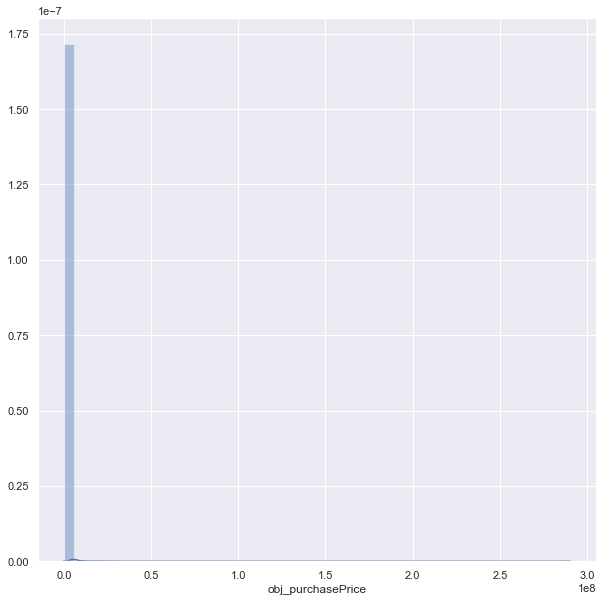

In [22]:
ax = sns.distplot(df_full['obj_purchasePrice'])
sns.set(rc={'figure.figsize':(10,10)})

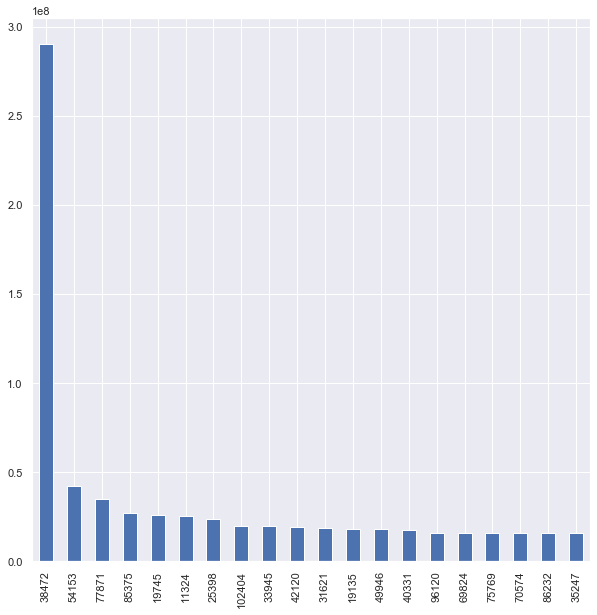

In [23]:
df_full.obj_purchasePrice.sort_values(ascending=False)[:20].plot(kind="bar")
plt.show()

In [24]:
df_full.iloc[38472,:][["beschreibung", "geo_bln", "geo_krs",
                      "geo_plz", "obj_balcony", "obj_cellar",
                      "obj_condition", "URL", "obj_floor", "obj_garden",
                      "obj_hasKitchen", "obj_heatingType",
                      "obj_interiorQual", "obj_lastRefurbish",
                      "obj_lift", "obj_livingSpace", 
                      "obj_newlyConst", "obj_noParkSpaces", 
                      "obj_noRooms", "obj_totalRent", 
                      "obj_typeOfFlat", "obj_yearConstructed", "index", "obj_purchasePrice"]]

C:\Users\d6002091\Downloads\Programs\Anaconda3\lib\site-packages\pandas\core\series.py:951: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


beschreibung           ['DHH   mit Keller EINZUGSBEREIT  !\n\nDiese h...
geo_bln                                                Baden_Württemberg
geo_krs                                                  Göppingen_Kreis
geo_plz                                                            73098
obj_balcony                                                          NaN
obj_cellar                                                          True
obj_condition                                             first_time_use
URL                                                    /expose/111749859
obj_floor                                                            NaN
obj_garden                                                           NaN
obj_hasKitchen                                                       NaN
obj_heatingType                                                heat_pump
obj_interiorQual                                                  normal
obj_lastRefurbish                                  

## ↑ There is a house with a very high price. This is an outlier and will be removed.

In [25]:
df_full.iloc[54153,:][["beschreibung", "geo_bln", "geo_krs",
                      "geo_plz", "obj_balcony", "obj_cellar",
                      "obj_condition", "URL", "obj_floor", "obj_garden",
                      "obj_hasKitchen", "obj_heatingType",
                      "obj_interiorQual", "obj_lastRefurbish",
                      "obj_lift", "obj_livingSpace", 
                      "obj_newlyConst", "obj_noParkSpaces", 
                      "obj_noRooms", "obj_totalRent", 
                      "obj_typeOfFlat", "obj_yearConstructed", "index", "obj_purchasePrice"]]

beschreibung           ['Vierseitgutshof in unvergleichlicher Weitbli...
geo_bln                                                           Bayern
geo_krs                                    Bad_Tölz_Wolfratshausen_Kreis
geo_plz                                                            82541
obj_balcony                                                          NaN
obj_cellar                                                         False
obj_condition                                             no_information
URL                                                    /expose/107736753
obj_floor                                                            NaN
obj_garden                                                           NaN
obj_hasKitchen                                                       NaN
obj_heatingType                                                     None
obj_interiorQual                                          no_information
obj_lastRefurbish                                  

In [26]:
df_full = df_full[df_full.URL != '/expose/111749859']
sum(df_full.URL=='/expose/111749859')

0

In [27]:
sum(df_full.obj_purchasePrice==0)

276

In [28]:
df_full = df_full[df_full.obj_purchasePrice != 0]
sum(df_full.obj_purchasePrice==0)

0

## ↑ We remove the zero values as well.

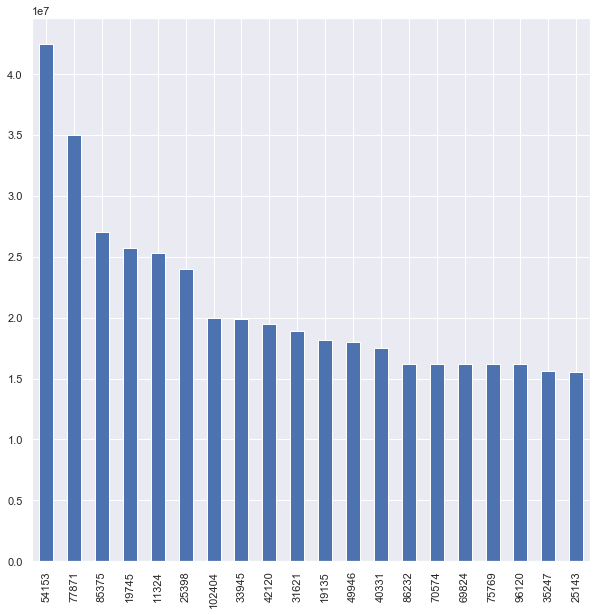

In [29]:
df_full.obj_purchasePrice.sort_values(ascending=False)[:20].plot(kind="bar")
plt.show()

In [30]:
sum(df_full.obj_purchasePrice <= 10000)

293

## ↑ And the ones which are less than 10,000€

In [31]:
df_full.shape

(108166, 84)

In [32]:
df_full = df_full[df_full.obj_purchasePrice > 10000]
sum(df_full.obj_purchasePrice <= 10000)

0

In [33]:
df_full.shape

(107873, 84)

In [34]:
df_full['word_count'] = df_full['beschreibung'].apply(lambda x: len(str(x).split(" ")))
df_full[['word_count','beschreibung']].head()

,word_count,beschreibung
0,249,['Das im Jahr 1964 in massiver Bauweise erstel...
1,431,['Man betritt das Haus über den Windfang mit a...
2,240,['Wohnen auf einer Ebene. Zum Verkauf steht ei...
3,382,"['Dieses hochwertige, teilunterkellerte Zweifa..."
4,242,['Nur einen Katzensprung von Neunkirchen entfe...


In [35]:
df_full['word_count_upper'] = df_full['beschreibung'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df_full[['word_count_upper','beschreibung']].head()

,word_count_upper,beschreibung
0,5,['Das im Jahr 1964 in massiver Bauweise erstel...
1,1,['Man betritt das Haus über den Windfang mit a...
2,3,['Wohnen auf einer Ebene. Zum Verkauf steht ei...
3,3,"['Dieses hochwertige, teilunterkellerte Zweifa..."
4,4,['Nur einen Katzensprung von Neunkirchen entfe...


In [36]:
df_full['beschreibung_length'] = df_full['beschreibung'].str.len() ## this also includes spaces
df_full[['beschreibung_length','beschreibung']].head()

,beschreibung_length,beschreibung
0,1948,['Das im Jahr 1964 in massiver Bauweise erstel...
1,3166,['Man betritt das Haus über den Windfang mit a...
2,1838,['Wohnen auf einer Ebene. Zum Verkauf steht ei...
3,3334,"['Dieses hochwertige, teilunterkellerte Zweifa..."
4,1930,['Nur einen Katzensprung von Neunkirchen entfe...


In [37]:
df_full['price_per_m²_living'] = df_full['obj_purchasePrice'] / df_full['obj_livingSpace'] 
df_full['price_per_m²_living'] = df_full['price_per_m²_living'].replace(np.inf, np.nan)
df_full['price_per_m²_property'] = df_full['obj_purchasePrice'] / df_full['obj_lotArea'] 
df_full['price_per_m²_property'] = df_full['price_per_m²_property'].replace(np.inf, np.nan)

## ↑ Above we added some measures: Word count, word count upper, length of text, price per m² living and property

In [38]:
df_full.obj_zipCode = df_full.obj_zipCode.astype(str)
df_full.geo_plz = df_full.geo_plz.astype(str)
df_full.obj_cId = df_full.obj_cId.astype(str)
df_full.obj_scoutId = df_full.obj_scoutId.astype(str)

In [39]:
plz = pd.ExcelFile("plz-5stellig-daten.xlsx").parse(0)
plz.plz = plz.plz.astype(int)
plz.plz = plz.plz.astype(str)
df_full = df_full.merge(plz[["plz","qkm","einwohner"]],left_on="geo_plz",right_on="plz",how="left")
df_full["bev_pro_km2"] = df_full.einwohner/df_full.qkm

In [40]:
geo = pd.read_csv("DE.tab",sep="\t")
geo_split = pd.concat([geo.lat,geo.lon,geo.plz.str.split(",",expand=True)],axis=1)
geo_split_melt = geo_split.melt(id_vars=["lat","lon"],value_name="plz").drop("variable",axis=1)
geo_split_melt = geo_split_melt.loc[geo_split_melt.plz.isnull()==0]
geo_split_melt = geo_split_melt.loc[geo_split_melt.plz!=""]
geo_split_melt.plz = geo_split_melt.plz.astype(int)
geo_split_melt.plz = geo_split_melt.plz.astype(str)
geo_split_melt_grouped = geo_split_melt.groupby("plz").agg({"lat":["mean"],"lon":["mean"]}).reset_index()
geo_split_melt_grouped.columns = geo_split_melt_grouped.columns.get_level_values(0)
df_full = df_full.merge(geo_split_melt_grouped[["plz","lat","lon"]],left_on="geo_plz",right_on="plz",how="left")

C:\Users\d6002091\Downloads\Programs\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## ↑ We added the PLZ and Lat lon data. Also we added the amount of capita per km²

In [41]:
df_full.obj_ExclusiveExpose = df_full.obj_ExclusiveExpose.astype(str)
df_full.obj_telekomDownloadSpeed = df_full.obj_telekomDownloadSpeed.str.replace(" MBit/s","").astype(float)
df_full.obj_telekomHybridDownloadSpeed = df_full.obj_telekomHybridDownloadSpeed.str.replace(" MBit/s","").astype(float)
df_full.obj_telekomHybridUploadSpeed = df_full.obj_telekomHybridUploadSpeed.str.replace(" MBit/s","").astype(float)
df_full.obj_telekomUploadSpeed = df_full.obj_telekomUploadSpeed.str.replace(" MBit/s","").str.replace(",",".").astype(float)
df_full.obj_telekomInternet = df_full.obj_telekomInternet.str.replace(" MBit/s","").str.replace(" kBit/s","")
df_full.obj_telekomInternet = df_full.obj_telekomInternet.astype(float)
df_full.obj_telekomHdTelephone = (df_full.obj_telekomHdTelephone*1).fillna(0)
df_full.obj_telekomInternetProductAvailable = (df_full.obj_telekomInternetProductAvailable*1).fillna(0)

In [42]:
df_full.drop(columns =["plz_x"], inplace = True) 
df_full.drop(columns =["plz_y"], inplace = True) 

In [43]:
df_full['obj_firingTypes'] = df_full['obj_firingTypes'].str.split(":", n = 1, expand = True)[0]

## ↑ Some more information for example internet speed and firing types fixed.

In [329]:
df_full.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105588 entries, 0 to 105587
Data columns (total 93 columns):
Generated_index                        105588 non-null int64
Timestamp                              105588 non-null datetime64[ns]
URL                                    105588 non-null object
beschreibung                           105588 non-null object
ga_cd_developer_virtualreality         2323 non-null object
ga_cd_application_requirements         105588 non-null object
ga_cd_customer_group                   13751 non-null object
ga_cd_cxp_historicallisting            105587 non-null object
ga_cd_maillead_default_shown           105588 non-null object
ga_cd_via                              105588 non-null object
ga_cd_via_qualified                    6635 non-null object
geo_bln                                105588 non-null object
geo_krs                                105588 non-null object
geo_land                               105588 non-null object
geo_plz            

# Exploratory Data Analysis

## Location

In [45]:
grouped = df_full.groupby('geo_bln').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('geo_bln').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['geo_bln','URL']], left_on='geo_bln', right_on='geo_bln')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

,geo_bln,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,obj_picturecount,obj_pricetrendrent,obj_thermalChar,...,obj_lastRefurbish,obj_yearConstructed,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,Nordrhein_Westfalen,471966.00,207.36,1349.28,2.39,6.87,2.20,14.87,4.23,158.01,...,2009.98,1968.71,370.06,4.46,2901.71,2510.58,4153.20,71.99,1171.04,19388
1,Bayern,718053.67,234.71,1342.64,2.40,6.45,2.39,15.08,4.14,138.55,...,2010.03,1977.91,360.40,5.24,2861.73,3997.00,2486.86,78.31,606.99,14130
2,Niedersachsen,344956.08,193.51,1737.06,2.39,6.57,1.96,15.05,4.02,157.96,...,2010.36,1968.01,353.56,4.26,2756.58,2216.52,1263.61,58.23,386.08,12765
3,Baden_Württemberg,599258.09,202.77,1206.66,2.59,7.15,2.51,14.59,4.52,154.19,...,2009.20,1969.03,329.84,4.12,2583.54,3168.08,1718.80,71.33,618.60,12262
4,Rheinland_Pfalz,336743.32,263.56,1328.66,2.65,6.65,2.22,15.16,3.63,162.87,...,2009.53,1962.89,334.80,4.10,2643.70,2120.19,828.20,60.61,374.28,9445
5,Hessen,573124.92,234.10,1008.18,2.57,7.11,2.39,13.93,2.91,160.40,...,2008.52,1963.12,362.80,5.03,2857.38,3062.23,1713.57,72.84,651.61,8933
6,Schleswig_Holstein,500126.16,172.22,1986.92,2.31,5.83,2.04,15.45,4.85,151.42,...,2010.53,1971.18,382.17,6.01,2949.58,2966.98,933.00,72.33,441.33,5765
7,Sachsen,304655.02,244.08,1586.05,2.79,8.24,2.21,12.96,5.15,153.28,...,2004.44,1947.14,331.01,3.73,2611.55,4259.80,541.78,67.43,486.92,5567
8,Brandenburg,421280.24,194.29,1876.29,2.64,6.40,1.98,13.09,7.11,139.21,...,2009.60,1969.41,360.14,3.96,2802.99,2684.99,563.00,70.59,308.57,5146
9,Sachsen_Anhalt,215881.36,211.60,1464.44,2.86,7.46,1.99,13.31,1.78,163.10,...,2006.96,1945.49,300.68,3.45,2354.61,1151.94,409.11,61.67,282.31,3471


## ↑ A first glance at the data. Berlin and Hamburg have the most expensive houses, Sachsen-Anhalt and Thüringen the cheapest.

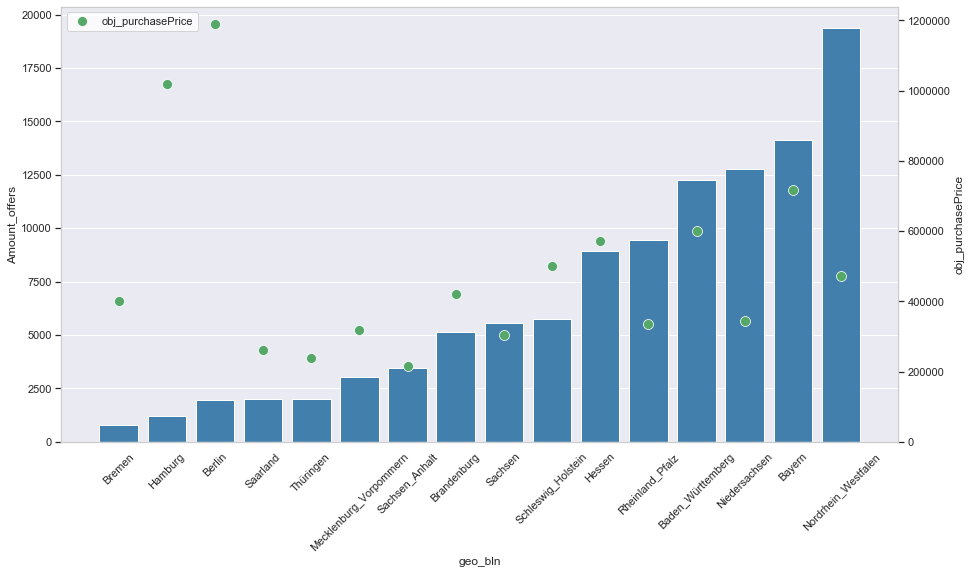

In [46]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('Amount_offers')
ax= sns.barplot(x = 'geo_bln', y = 'Amount_offers',  label='Amount_offers', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'geo_bln', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

## ↑ Amount of offers and average price
Nordrhein Westfalen has the most offers in the database. Bremen has the fewest. Looking at average price and amount of offers shows that Bavaria is the highest. 

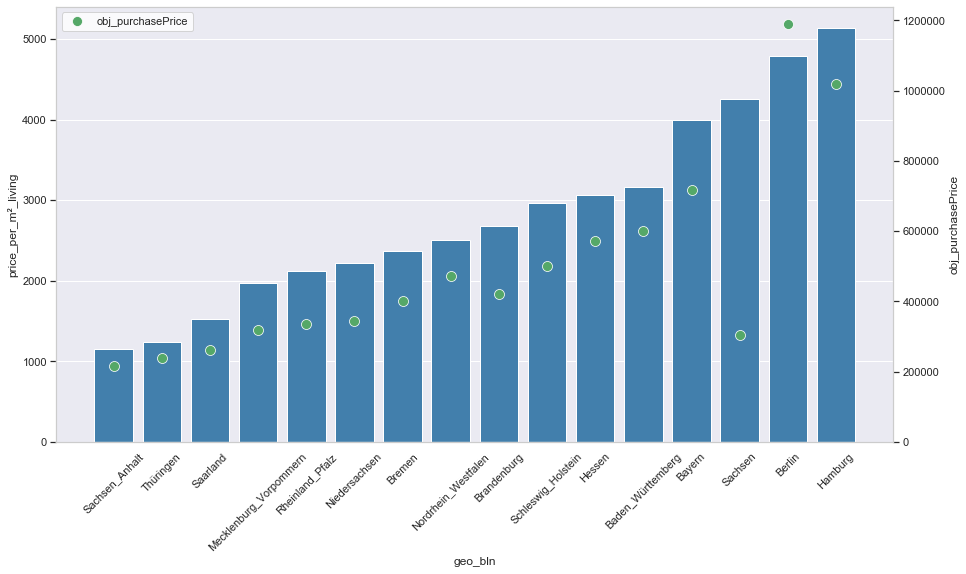

In [47]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('price_per_m²_living')
ax= sns.barplot(x = 'geo_bln', y = 'price_per_m²_living',  label='price_per_m²_living', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'geo_bln', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

## ↑ Price per living m² and average price

Hamburg has the highest price per m². Interesting is Saxony, the price per m² is unexpectly high. Lowest county is Sachsen-Anhalt with 1,000 per m² and an average price of 215 KEUR.

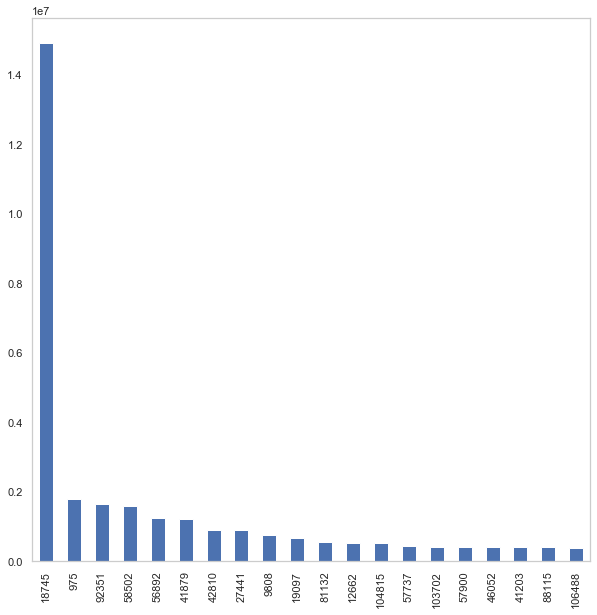

In [48]:
df_full['price_per_m²_living'].sort_values(ascending=False)[:20].plot(kind="bar")
plt.show()

In [49]:
df_full.iloc[18745,:][["beschreibung", "geo_bln", "geo_krs",
                      "geo_plz", "obj_balcony", "obj_cellar",
                      "obj_condition", "URL", "obj_floor", "obj_garden",
                      "obj_hasKitchen", "obj_heatingType",
                      "obj_interiorQual", "obj_lastRefurbish",
                      "obj_lift", "obj_livingSpace", 
                      "obj_newlyConst", "obj_noParkSpaces", 
                      "obj_noRooms", "obj_totalRent", 
                      "obj_typeOfFlat", "obj_yearConstructed", "index", "obj_purchasePrice"]]

C:\Users\d6002091\Downloads\Programs\Anaconda3\lib\site-packages\pandas\core\series.py:951: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


beschreibung           ['Der Gasthof ist sehr beliebt und über die Gr...
geo_bln                                                          Sachsen
geo_krs                                                    Vogtlandkreis
geo_plz                                                             8606
obj_balcony                                                          NaN
obj_cellar                                                         False
obj_condition                                                  well_kept
URL                                                    /expose/112952906
obj_floor                                                            NaN
obj_garden                                                           NaN
obj_hasKitchen                                                       NaN
obj_heatingType                                          central_heating
obj_interiorQual                                                  normal
obj_lastRefurbish                                  

In [50]:
df_full = df_full[df_full.URL != '/expose/112952906']
sum(df_full.URL=='/expose/112952906')

0

## ↑ Mistake has been found and removed. A house with a obj_livingSpace of 0.01

In [51]:
grouped = df_full.groupby('geo_bln').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('geo_bln').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['geo_bln','URL']], left_on='geo_bln', right_on='geo_bln')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

,geo_bln,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,obj_picturecount,obj_pricetrendrent,obj_thermalChar,...,obj_lastRefurbish,obj_yearConstructed,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,Nordrhein_Westfalen,471966.00,207.36,1349.28,2.39,6.87,2.20,14.87,4.23,158.01,...,2009.98,1968.71,370.06,4.46,2901.71,2510.58,4153.20,71.99,1171.04,19388
1,Bayern,718053.67,234.71,1342.64,2.40,6.45,2.39,15.08,4.14,138.55,...,2010.03,1977.91,360.40,5.24,2861.73,3997.00,2486.86,78.31,606.99,14130
2,Niedersachsen,344956.08,193.51,1737.06,2.39,6.57,1.96,15.05,4.02,157.96,...,2010.36,1968.01,353.56,4.26,2756.58,2216.52,1263.61,58.23,386.08,12765
3,Baden_Württemberg,599258.09,202.77,1206.66,2.59,7.15,2.51,14.59,4.52,154.19,...,2009.20,1969.03,329.84,4.12,2583.54,3168.08,1718.80,71.33,618.60,12262
4,Rheinland_Pfalz,336743.32,263.56,1328.66,2.65,6.65,2.22,15.16,3.63,162.87,...,2009.53,1962.89,334.80,4.10,2643.70,2120.19,828.20,60.61,374.28,9445
5,Hessen,573124.92,234.10,1008.18,2.57,7.11,2.39,13.93,2.91,160.40,...,2008.52,1963.12,362.80,5.03,2857.38,3062.23,1713.57,72.84,651.61,8933
6,Schleswig_Holstein,500126.16,172.22,1986.92,2.31,5.83,2.04,15.45,4.85,151.42,...,2010.53,1971.18,382.17,6.01,2949.58,2966.98,933.00,72.33,441.33,5765
7,Sachsen,304682.99,244.13,1586.01,2.77,8.24,2.21,12.96,5.15,153.10,...,2004.44,1947.17,331.02,3.73,2611.64,1580.23,541.87,67.42,486.99,5566
8,Brandenburg,421280.24,194.29,1876.29,2.64,6.40,1.98,13.09,7.11,139.21,...,2009.60,1969.41,360.14,3.96,2802.99,2684.99,563.00,70.59,308.57,5146
9,Sachsen_Anhalt,215881.36,211.60,1464.44,2.86,7.46,1.99,13.31,1.78,163.10,...,2006.96,1945.49,300.68,3.45,2354.61,1151.94,409.11,61.67,282.31,3471


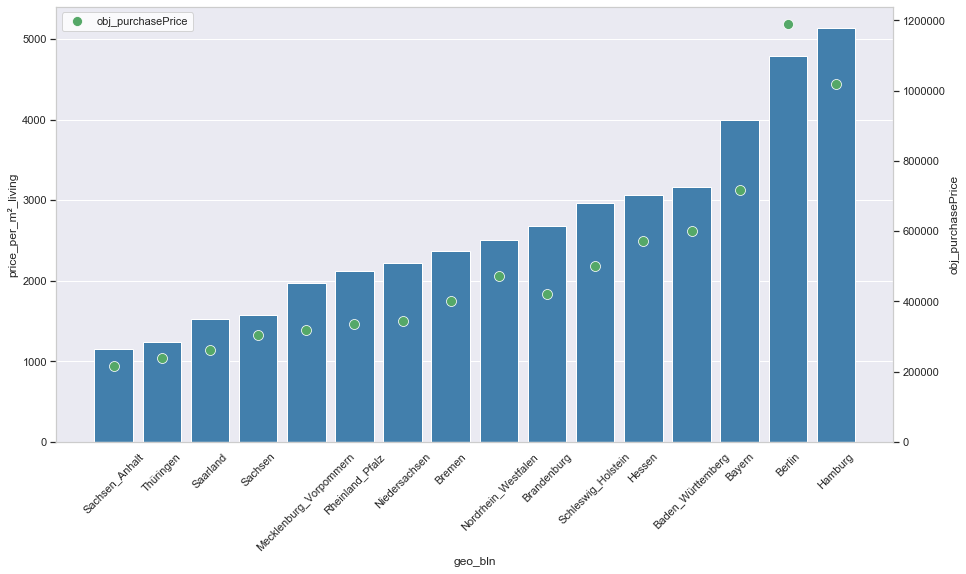

In [52]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('price_per_m²_living')
ax= sns.barplot(x = 'geo_bln', y = 'price_per_m²_living',  label='price_per_m²_living', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'geo_bln', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

## ↑ That looks better :D. A good case for the importance of a proper EDA.

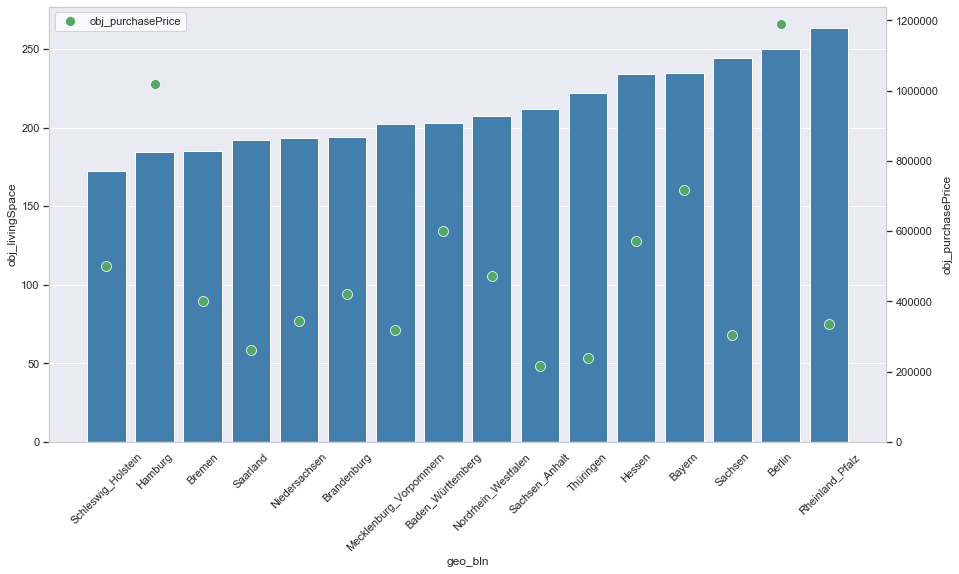

In [53]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('obj_livingSpace')
ax= sns.barplot(x = 'geo_bln', y = 'obj_livingSpace',  label='obj_livingSpace', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'geo_bln', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

## ↑ Living space and average price

Rheinland Pfalz has the biggest houses, Schleswig Holstein the smallest.

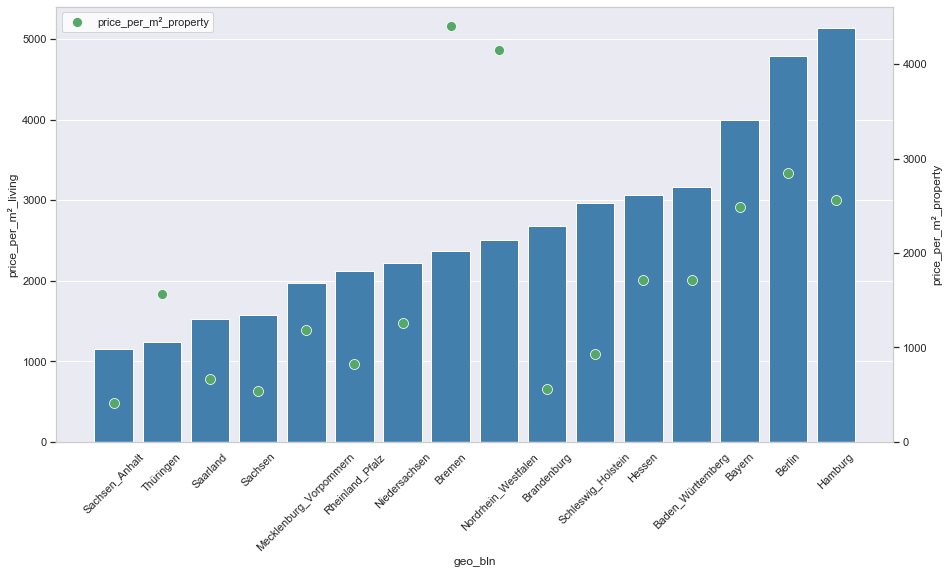

In [54]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('price_per_m²_living')
ax= sns.barplot(x = 'geo_bln', y = 'price_per_m²_living',  label='price_per_m²_living', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'geo_bln', y = 'price_per_m²_property', marker="o",  label='price_per_m²_property', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

## ↑ Price per m² living and price per m² property

Hamburg and Berlin are the most expensive cities. Sachsen-Anhalt and Thüringen are the cheapest.

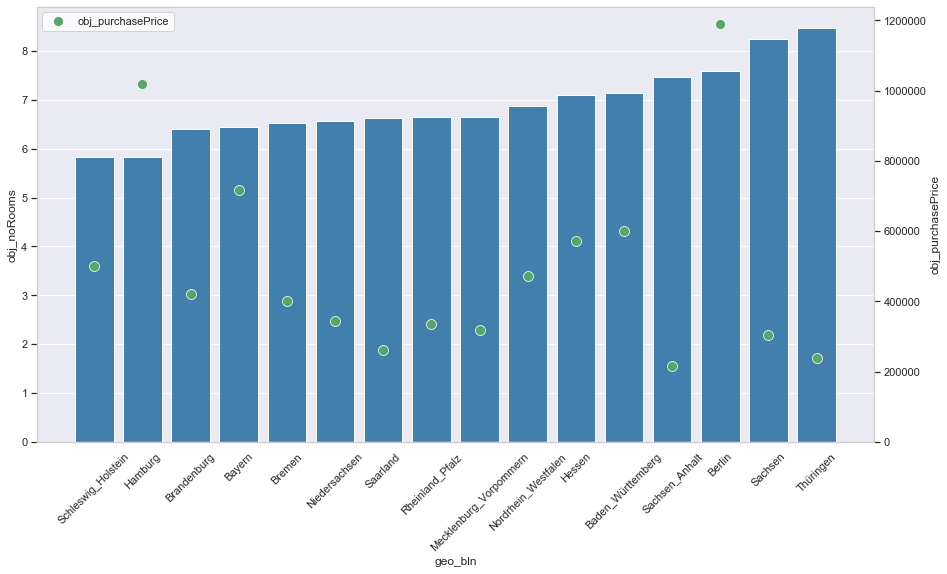

In [55]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('obj_noRooms')
ax= sns.barplot(x = 'geo_bln', y = 'obj_noRooms',  label='obj_noRooms', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'geo_bln', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

## ↑ Average number of rooms and average price

In Thüringen you get most rooms for your money. Hamburg has the smallest amount of rooms per house.

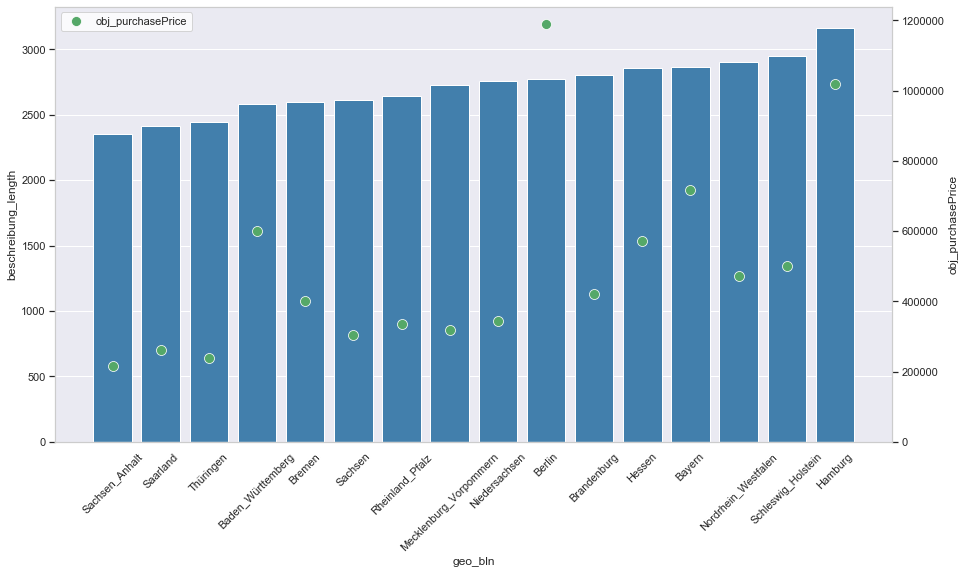

In [56]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('beschreibung_length')
ax= sns.barplot(x = 'geo_bln', y = 'beschreibung_length',  label='beschreibung_length', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'geo_bln', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

## ↑ Average length of description text and average price

People in Hamburg seem to write the longest texts. Berlin is in the upper half. Sachsen-Anhalt has the shortest texts per Expose.

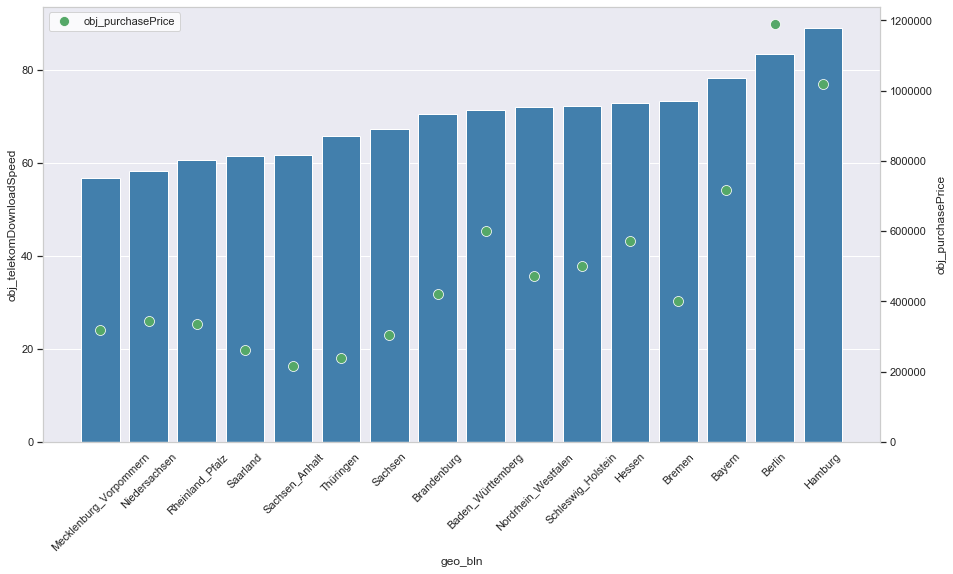

In [57]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('obj_telekomDownloadSpeed')
ax= sns.barplot(x = 'geo_bln', y = 'obj_telekomDownloadSpeed',  label='obj_telekomDownloadSpeed', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'geo_bln', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

## ↑ Average download speed and average price

Fastest internet is being offered in Hamburg and Berlin. Mecklenburg-Vorpommern and Niedersachsen have the slowest.

In [58]:
grouped = df_full.groupby('geo_krs').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('geo_krs').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['geo_krs','URL']], left_on='geo_krs', right_on='geo_krs')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('obj_purchasePrice', ascending=False).reset_index(drop="True")
grouped.head(10)

,geo_krs,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,obj_picturecount,obj_pricetrendrent,obj_thermalChar,...,obj_lastRefurbish,obj_yearConstructed,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,Miesbach_Kreis,1854508.49,243.79,2564.71,2.72,7.45,2.37,11.71,4.43,135.58,...,2012.61,1980.25,311.50,4.12,2417.78,7223.77,2115.56,81.66,173.17,136
1,Heidelberg,1817992.84,297.56,659.54,2.79,10.09,3.04,15.33,19.07,160.32,...,2009.00,1951.60,367.60,3.91,2843.64,5945.84,4208.44,22.42,1516.79,70
2,München,1811270.30,192.96,428.42,1.48,6.05,2.82,12.47,4.23,105.91,...,2009.84,1991.87,420.29,6.25,3312.18,9179.60,11520.59,88.87,4027.52,728
3,Frankfurt_am_Main,1805790.72,327.70,518.56,2.73,11.22,2.89,11.35,3.59,149.12,...,2009.75,1965.73,374.62,5.44,2947.45,6721.29,7296.07,86.97,3445.48,381
4,Starnberg_Kreis,1762676.84,210.30,2161.26,2.12,6.16,2.58,12.89,3.64,106.16,...,2011.49,1994.55,416.74,6.39,3298.61,8211.13,2924.18,85.13,311.89,361
5,Bad_Tölz_Wolfratshausen_Kreis,1735076.34,234.62,1348.85,2.25,6.61,2.60,15.46,2.09,117.29,...,2011.25,1983.70,387.01,4.25,2999.58,6732.27,2351.41,62.91,502.36,153
6,Düsseldorf,1690622.92,340.94,1001.67,2.26,9.94,2.59,14.75,5.46,168.30,...,2009.83,1964.35,397.89,5.90,3115.07,5378.69,3349.69,76.79,3648.40,311
7,München_Kreis,1681455.67,191.52,523.49,1.81,5.76,2.61,14.14,4.32,119.10,...,2013.06,1994.11,434.19,5.97,3461.57,8350.91,3467.28,83.63,1107.69,413
8,Baden_Baden,1650587.02,316.60,1372.34,2.57,8.43,2.79,13.46,10.15,127.06,...,2010.68,1956.16,325.91,2.86,2572.80,4766.11,1964.79,95.74,512.23,109
9,Garmisch_Partenkirchen_Kreis,1419686.81,277.38,1363.90,3.06,8.64,2.33,16.39,0.82,146.53,...,2010.13,1960.66,429.72,5.29,3324.53,5733.08,9885.89,92.69,113.60,72


## ↑ The most expensive 10 places in Germany to live

Miesbach (Tegernsee), Munich, Frankfurt (Main) are the most expensive with an average price of 1.8 MEUR. 

In [59]:
grouped = df_full.groupby('geo_krs').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('geo_krs').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['geo_krs','URL']], left_on='geo_krs', right_on='geo_krs')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('obj_purchasePrice', ascending=True).reset_index(drop="True")
grouped.head(10)

,geo_krs,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,obj_picturecount,obj_pricetrendrent,obj_thermalChar,...,obj_lastRefurbish,obj_yearConstructed,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,Kyffhäuserkreis,72758.17,177.81,1000.96,2.00,6.22,2.10,10.54,2.26,212.32,...,2003.92,1911.82,215.75,4.86,1737.79,1605.46,156.40,64.76,90.31,72
1,Mansfeld_Südharz_Kreis,92773.46,149.94,2236.30,1.85,5.73,1.84,12.47,0.58,218.03,...,2006.70,1930.57,225.85,2.96,1783.03,652.76,149.06,64.25,139.38,296
2,Holzminden_Kreis,139936.87,194.68,926.56,2.43,7.35,2.01,14.12,-4.88,224.93,...,2011.97,1929.48,319.74,3.24,2529.97,806.53,203.65,67.44,119.46,194
3,Unstrut_Hainich_Kreis,140439.66,191.44,877.21,2.79,6.81,2.10,13.61,-6.96,141.11,...,2004.96,1927.66,264.28,4.02,2104.46,696.43,242.49,39.76,134.97,127
4,Sonneberg_Kreis,141967.56,163.18,873.74,2.20,6.20,2.24,11.87,1.83,135.98,...,2005.86,1942.19,315.87,4.96,2477.61,976.76,266.73,85.76,153.28,54
5,Salzlandkreis,147431.76,225.30,1206.36,3.47,7.73,1.97,11.37,3.78,194.32,...,2005.77,1931.60,289.55,3.73,2236.82,807.83,236.40,49.10,211.84,369
6,Nordhausen_Kreis,150300.77,165.85,1672.17,1.93,5.83,1.88,14.05,2.99,140.67,...,1996.90,1945.31,288.05,2.78,2326.97,965.36,192.25,44.92,153.52,60
7,Schmalkalden_Meiningen_Kreis,157474.67,161.99,893.95,2.62,6.09,2.21,12.82,3.96,146.57,...,2007.81,1953.07,260.84,2.75,2047.60,1025.90,246.56,64.30,119.45,134
8,Stendal_Kreis,157610.06,195.33,1625.79,2.61,7.57,1.85,11.76,4.32,142.12,...,2007.69,1940.73,282.70,3.48,2149.09,903.39,220.53,88.07,66.51,161
9,Hof_Kreis,158855.50,170.32,1096.36,2.05,6.60,2.08,12.40,-3.02,194.25,...,2009.38,1951.96,292.22,3.85,2319.41,1057.70,262.59,59.70,125.20,302


## ↑ The least expensive 10 places in Germany to live

Kyffhäuserkreis, Südharz and Holzminden. In Kyffhäuserkreis you get a house for an average of 73 KEUR. That is 4%!

## Condition

In [60]:
grouped = df_full.groupby('obj_buildingType').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_buildingType').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_buildingType','URL']], left_on='obj_buildingType', right_on='obj_buildingType')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

,obj_buildingType,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,obj_picturecount,obj_pricetrendrent,obj_thermalChar,...,obj_lastRefurbish,obj_yearConstructed,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,single_family_house,434037.23,175.56,1145.39,2.25,5.73,2.03,15.78,4.18,154.90,...,2009.27,1973.65,369.75,4.48,2909.53,2626.51,1689.05,67.43,504.32,44929
1,multi_family_house,622696.01,341.32,1127.15,3.87,11.94,2.64,15.34,3.84,166.76,...,2008.32,1946.46,344.47,4.54,2657.38,2319.61,3348.29,71.75,945.37,15407
2,semidetached_house,463696.40,140.64,481.94,1.67,5.07,2.38,13.97,4.27,135.50,...,2010.45,1984.49,357.55,4.29,2799.86,3249.22,1536.47,73.01,866.44,11664
3,other_real_estate,342412.16,200.12,1992.71,3.20,6.80,2.18,6.31,3.83,170.14,...,2006.67,1950.06,256.45,5.11,2087.72,2020.13,1216.94,66.31,646.51,10253
4,no_information,520876.73,402.09,2128.45,2.96,7.51,2.35,14.64,4.03,155.86,...,2009.24,1959.78,339.38,4.28,2654.18,2951.34,2250.94,69.58,715.44,6989
5,mid_terrace_house,374188.26,134.08,322.56,1.53,5.04,2.57,14.45,4.16,134.49,...,2010.78,1974.30,347.71,4.22,2691.88,2896.51,3086.17,77.31,1276.93,5245
6,bungalow,374521.49,131.98,1048.30,1.91,4.33,1.16,14.50,4.36,140.48,...,2010.79,1991.84,369.05,3.93,2920.65,2829.57,969.09,67.11,497.41,3791
7,end_terrace_house,434508.86,136.11,358.18,8.94,5.10,2.55,14.90,4.12,144.39,...,2010.62,1980.84,352.36,4.34,2737.39,3279.15,2020.97,76.71,1099.60,3329
8,villa,1481262.58,333.49,3043.14,3.15,8.99,2.47,16.31,4.34,130.47,...,2010.50,1966.54,445.78,4.90,3495.60,4358.47,1344.49,71.25,953.20,2735
9,special_real_estate,722191.09,322.33,6117.78,4.65,9.17,2.31,18.63,4.21,163.84,...,2009.69,1932.85,360.61,4.51,2776.04,3792.96,1665.37,63.41,554.32,1810


## ↑ Houses by type

Most houses are single_family_house, followed by multi_family_house

In [130]:
grouped = df_full.groupby(['obj_buildingType','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_buildingType','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_buildingType','geo_bln'], right_on=['obj_buildingType','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_buildingType','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_buildingType', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_buildingType,bungalow,castle_manor_house,end_terrace_house,farmhouse,mid_terrace_house,multi_family_house,no_information,other_real_estate,semidetached_house,single_family_house,special_real_estate,villa
geo_bln,,,,,,,,,,,,
Baden_Württemberg,191.00,7.00,444.00,161.00,556.00,2223.00,732.00,997.00,1607.00,4818.00,238.00,288.00
Bayern,366.00,9.00,594.00,230.00,736.00,1746.00,1029.00,952.00,2311.00,5596.00,197.00,364.00
Berlin,59.00,0.00,58.00,0.00,163.00,234.00,147.00,82.00,276.00,756.00,31.00,150.00
Brandenburg,291.00,7.00,49.00,77.00,109.00,511.00,481.00,405.00,413.00,2561.00,86.00,156.00
Bremen,11.00,0.00,81.00,1.00,206.00,112.00,46.00,36.00,75.00,212.00,4.00,21.00
Hamburg,28.00,0.00,88.00,0.00,172.00,74.00,61.00,93.00,204.00,380.00,4.00,87.00
Hessen,249.00,1.00,297.00,96.00,410.00,1449.00,580.00,978.00,776.00,3579.00,167.00,351.00
Mecklenburg_Vorpommern,151.00,15.00,57.00,77.00,108.00,371.00,248.00,362.00,343.00,1190.00,84.00,36.00
Niedersachsen,724.00,3.00,309.00,230.00,509.00,1631.00,835.00,1217.00,1105.00,5830.00,192.00,180.00


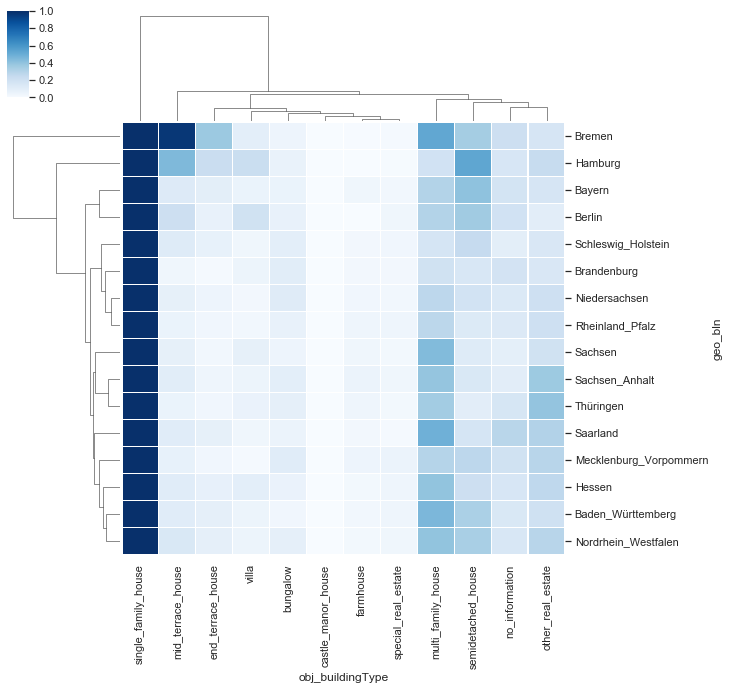

In [132]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Amount of houses by Region and type

## That is a new chart. It does the following: 
        -Scale the data by row (standard_scale=1) or column (standard_scale=0) to 0-1
        -Show the data as map - the higher, the darker
        -Cluster the data by column and row

Looking on the chart we see that:

         -Most of the houses are single family house
         -Bremen has the most mid terrace houses
         
The chart will be used more frequently in the analysis

In [63]:
grouped = df_full.groupby(['obj_buildingType','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_buildingType', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_buildingType,bungalow,castle_manor_house,end_terrace_house,farmhouse,mid_terrace_house,multi_family_house,no_information,other_real_estate,semidetached_house,single_family_house,special_real_estate,villa
geo_bln,,,,,,,,,,,,
Baden_Württemberg,692710.38,2428428.57,487686.80,449978.88,445825.42,761278.69,642226.53,479753.02,474371.86,541008.30,825208.39,1582979.81
Bayern,462200.60,2229722.22,696499.04,837227.83,597272.87,827814.23,567564.35,553855.77,738130.66,638468.62,1047609.31,2388083.48
Berlin,676027.36,0.00,640835.34,0.00,626831.65,2734450.88,965961.44,1133775.73,612946.04,870640.45,1512161.29,2657189.60
Brandenburg,248589.50,1445714.29,366680.12,293242.19,314768.09,595978.62,447488.11,295918.77,349822.63,398359.80,421774.19,1089802.27
Bremen,393613.64,0.00,344096.42,399000.00,298988.05,513268.93,470669.57,359972.22,329916.17,417733.35,567250.00,998761.90
Hamburg,1082301.89,0.00,529111.99,0.00,508484.03,1414928.72,1160172.13,961584.84,649168.20,945060.99,1573750.00,3275931.39
Hessen,488071.73,680000.00,499077.17,264202.50,490281.57,702394.56,734611.71,403674.54,538263.77,459442.09,889709.61,1634343.68
Mecklenburg_Vorpommern,205418.14,1896800.00,191050.88,341202.60,189600.83,414113.21,407979.36,228597.38,216766.71,306883.99,442767.80,1065201.25
Niedersachsen,309114.83,1149666.67,297348.45,356095.64,265152.88,443032.54,441145.08,248006.38,284401.11,327775.99,562915.20,785154.64


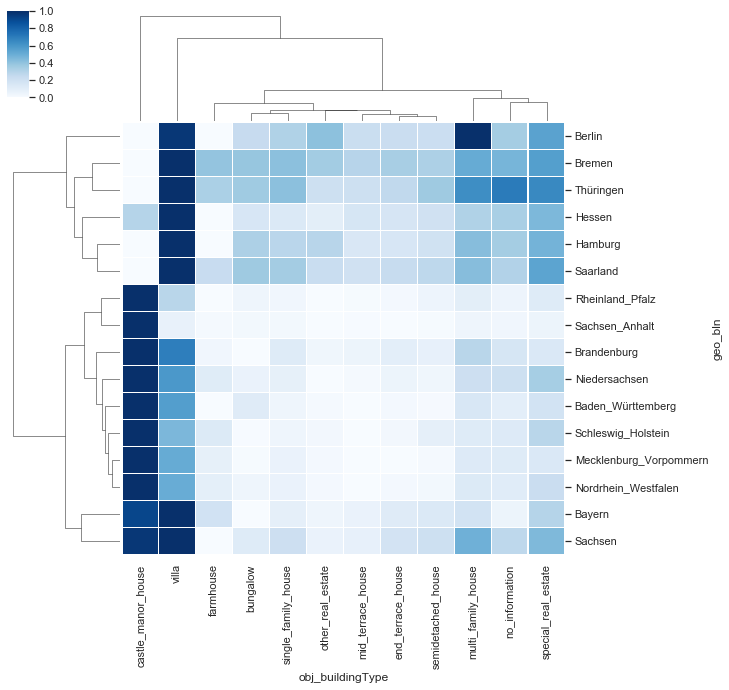

In [64]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Average prices of houses by Region and type

## The same chart as before just with average prices

We see that the castles are the most expensives. Also Villa types stand out. Berlin has the most expensive multi family houses. Rheinland Pfalz and Sachsen Anhalt seem to be on the lower scale in terms of pricing. 

In [65]:
grouped = df_full.groupby('obj_condition').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_condition').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_condition','URL']], left_on='obj_condition', right_on='obj_condition')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

,obj_condition,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,obj_picturecount,obj_pricetrendrent,obj_thermalChar,...,obj_lastRefurbish,obj_yearConstructed,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,no_information,429465.00,230.79,1711.68,3.84,6.85,2.17,11.63,3.99,171.41,...,2005.67,1960.18,312.16,4.26,2477.87,2541.90,1696.87,68.51,648.93,41112
1,well_kept,513419.43,213.14,1384.81,2.52,7.26,2.29,17.77,4.16,158.10,...,2009.63,1964.44,372.85,4.24,2856.36,2683.06,1786.15,70.16,750.08,25262
2,first_time_use,493985.55,158.01,634.61,2.09,5.12,2.09,12.17,4.43,33.68,...,2018.77,2018.95,398.63,5.82,3241.92,3196.40,3832.71,69.51,617.52,15051
3,need_of_renovation,308204.57,193.66,1462.46,2.29,7.30,2.26,15.01,3.82,239.73,...,2000.32,1932.34,316.52,3.48,2423.02,1976.91,890.71,68.84,666.74,8580
4,mint_condition,785309.64,210.39,1400.29,2.57,6.26,2.23,18.14,4.32,79.13,...,2014.10,1998.14,413.52,4.95,3231.53,3669.93,1666.84,70.47,753.44,6296
5,modernized,572033.03,273.33,1495.56,2.69,7.70,2.40,18.89,3.96,156.81,...,2012.60,1950.80,386.16,4.79,2975.25,2907.27,1296.17,70.74,861.05,5186
6,refurbished,676256.81,270.92,2013.24,3.04,8.96,2.42,18.13,4.07,156.24,...,2011.45,1929.69,378.91,4.49,2923.25,2557.00,1727.41,71.68,867.94,3292
7,fully_renovated,589978.57,228.44,2049.41,2.91,7.74,2.33,17.99,3.94,153.28,...,2012.61,1942.12,354.67,3.92,2715.11,2749.43,1697.30,68.92,714.53,2077
8,negotiable,484104.05,235.98,1379.79,2.79,8.37,2.17,15.86,4.01,186.88,...,2009.04,1957.37,370.23,4.60,2814.40,2272.41,1915.10,69.86,713.52,462
9,first_time_use_after_refurbishment,790715.67,252.16,1422.82,2.68,8.62,2.47,17.89,3.97,134.17,...,2018.03,1943.12,384.07,4.00,2984.82,3188.98,2969.49,69.54,1161.43,454


In [66]:
grouped = df_full.groupby(['obj_condition','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_condition','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_condition','geo_bln'], right_on=['obj_condition','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_condition','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_condition', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_condition,first_time_use,first_time_use_after_refurbishment,fully_renovated,mint_condition,modernized,need_of_renovation,negotiable,no_information,refurbished,ripe_for_demolition,well_kept
geo_bln,,,,,,,,,,,
Baden_Württemberg,1583.00,58.00,291.00,744.00,589.00,1018.00,82.00,4595.00,341.00,9.00,2952.00
Bayern,2648.00,61.00,276.00,961.00,535.00,971.00,58.00,4992.00,307.00,11.00,3310.00
Berlin,248.00,16.00,34.00,157.00,114.00,126.00,7.00,685.00,122.00,2.00,445.00
Brandenburg,852.00,14.00,64.00,287.00,164.00,311.00,26.00,2246.00,204.00,7.00,971.00
Bremen,72.00,8.00,16.00,42.00,45.00,63.00,1.00,282.00,28.00,0.00,248.00
Hamburg,214.00,8.00,17.00,101.00,81.00,60.00,7.00,411.00,26.00,0.00,266.00
Hessen,1090.00,26.00,177.00,539.00,503.00,788.00,30.00,3294.00,278.00,8.00,2200.00
Mecklenburg_Vorpommern,296.00,13.00,49.00,221.00,131.00,248.00,12.00,1207.00,118.00,9.00,738.00
Niedersachsen,1282.00,41.00,249.00,857.00,649.00,912.00,46.00,4810.00,316.00,10.00,3593.00


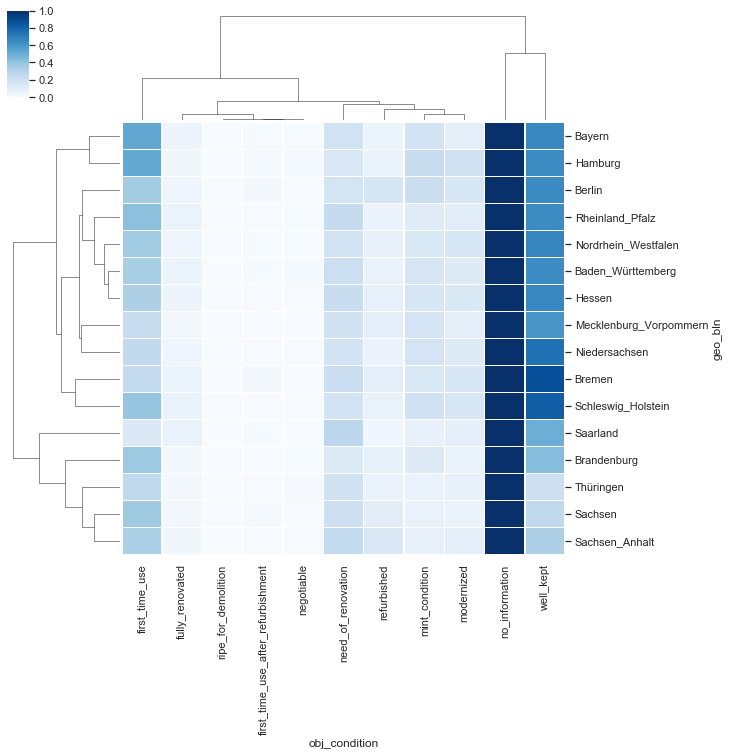

In [67]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Amount of houses by Region and condition

We see that the most of the houses have no information. We also see that Bremen and Schleswig Hollstein have well-kept homes. Bayern and Hamburg have the most first-time usage homes.

In [68]:
grouped = df_full.groupby(['obj_condition','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_condition', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_condition,first_time_use,first_time_use_after_refurbishment,fully_renovated,mint_condition,modernized,need_of_renovation,negotiable,no_information,refurbished,ripe_for_demolition,well_kept
geo_bln,,,,,,,,,,,
Baden_Württemberg,545618.07,864014.57,684764.78,913957.49,694978.57,450276.72,662745.51,537260.22,779079.76,214444.44,642496.39
Bayern,740772.66,889870.51,904871.74,1128435.05,802164.84,457329.21,657579.26,637969.91,947159.42,699387.27,725528.14
Berlin,843382.65,3024187.44,880588.21,1464603.11,1379169.30,1141287.52,1058285.71,1154591.81,2135836.15,387500.00,1008497.27
Brandenburg,408108.13,632064.29,469725.00,706090.48,461368.53,289070.62,336516.35,359396.22,767351.96,262428.57,451848.80
Bremen,403819.44,432875.00,342681.25,575398.21,455768.67,327540.32,459000.00,396892.16,376696.07,0.00,389402.69
Hamburg,851516.78,1810500.00,721145.06,1471912.38,1504559.26,555181.67,1075957.14,997564.69,2250419.23,0.00,839209.02
Hessen,588752.89,1094207.69,807625.98,917954.94,657365.31,368332.12,375293.97,514997.61,771368.02,372661.25,575374.71
Mecklenburg_Vorpommern,359050.71,374704.00,537674.69,502036.64,347803.86,153891.80,209411.83,269851.30,404270.69,70111.11,353695.32
Niedersachsen,346858.76,453056.05,434818.92,513355.58,391717.50,219989.04,368294.50,310380.85,428420.57,135130.00,359153.98


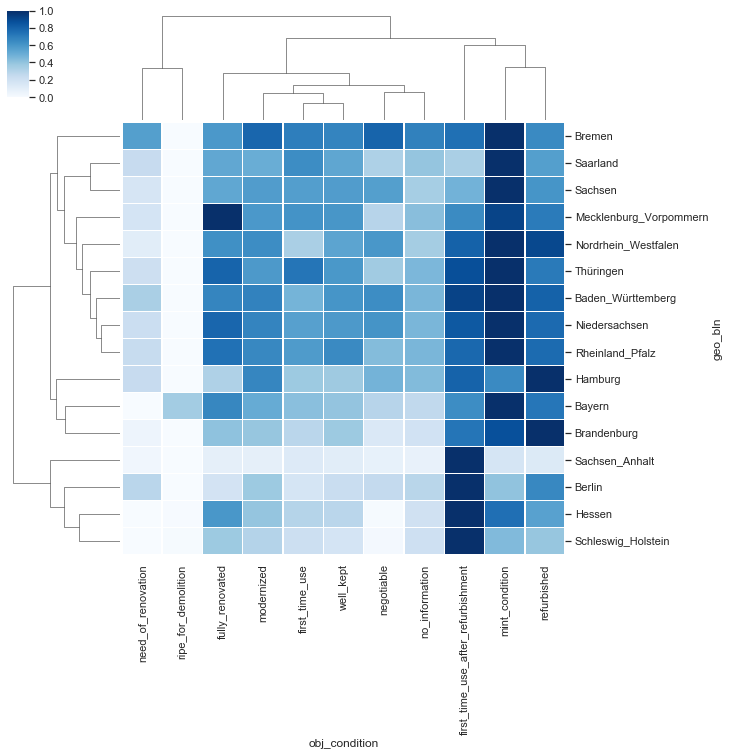

In [69]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Average price of houses by Region and condition

The most expensive homes are in mint-condition. 

In [70]:
grouped = df_full.groupby('obj_constructionPhase').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_constructionPhase').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_constructionPhase','URL']], left_on='obj_constructionPhase', right_on='obj_constructionPhase')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

,obj_constructionPhase,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,obj_picturecount,obj_pricetrendrent,obj_thermalChar,...,obj_lastRefurbish,obj_yearConstructed,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,no_information,500328.00,233.58,1698.48,2.62,7.27,2.30,14.02,4.01,161.38,...,2008.37,1958.08,333.63,4.56,2589.12,2678.95,1829.18,69.38,737.14,65205
1,completed,497327.69,204.31,1321.90,2.53,7.07,2.29,17.63,4.16,161.59,...,2009.84,1960.59,364.65,4.01,2816.23,2666.21,1405.41,70.15,705.98,23651
2,projected,417021.35,167.76,771.25,5.22,5.05,1.95,12.38,4.34,32.88,...,2018.64,2019.06,399.69,4.73,3296.32,2791.05,2897.92,68.90,516.85,17601
3,under_construction,670569.04,173.56,546.68,1.82,5.61,2.53,11.03,4.52,50.81,...,2017.57,2011.55,365.06,5.54,2872.81,3891.71,3748.83,67.29,881.00,1415


In [133]:
grouped = df_full.groupby(['obj_constructionPhase','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_constructionPhase','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_constructionPhase','geo_bln'], right_on=['obj_constructionPhase','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_constructionPhase','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_constructionPhase', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_constructionPhase,completed,no_information,projected,under_construction
geo_bln,,,,
Baden_Württemberg,3015,6988,2148,111
Bayern,2895,7802,3100,333
Berlin,476,1212,236,32
Brandenburg,1102,2726,1238,80
Bremen,170,564,54,17
Hamburg,161,868,135,27
Hessen,2063,5374,1351,145
Mecklenburg_Vorpommern,653,2048,303,38
Niedersachsen,2820,8590,1209,146


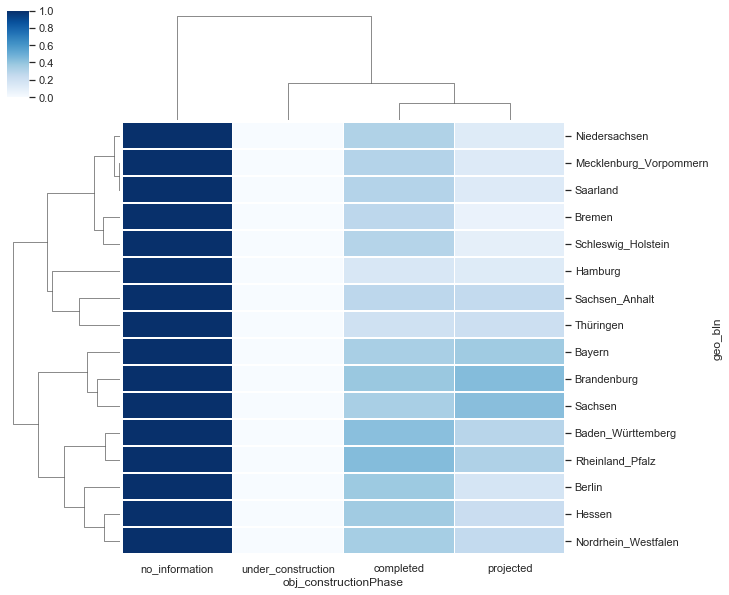

In [135]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Amount of houses by Region and construction phase

Most of the homes are finished but we see that Sachsen and Brandenburg and Sachsen have more projected than completed houses.

In [73]:
grouped = df_full.groupby(['obj_constructionPhase','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_constructionPhase', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_constructionPhase,completed,no_information,projected,under_construction
geo_bln,,,,
Baden_Württemberg,612594.43,622512.29,490828.22,871310.98
Bayern,740508.29,775388.12,526257.89,965013.04
Berlin,1024372.12,1315374.16,940124.47,724494.06
Brandenburg,470683.03,430930.22,347163.63,558888.40
Bremen,384862.59,408482.67,392476.94,342916.47
Hamburg,789487.36,1080519.25,858533.09,1154909.44
Hessen,605412.13,576781.41,497375.05,684018.83
Mecklenburg_Vorpommern,350397.15,314242.12,265661.58,444386.32
Niedersachsen,348319.83,345541.86,328014.47,385810.95


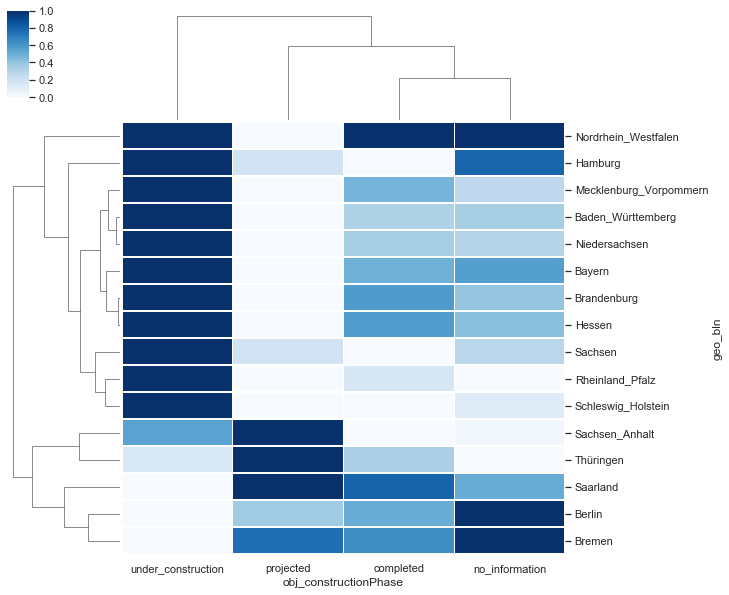

In [74]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Average price of houses by Region and construction phase

Interestingly, the projected houses in Sachsen, Sachsen-Anhalt, Thüringen and Saarland are more expensive.

In [75]:
grouped = df_full.groupby('obj_interiorQual').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_interiorQual').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_interiorQual','URL']], left_on='obj_interiorQual', right_on='obj_interiorQual')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

,obj_interiorQual,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,obj_picturecount,obj_pricetrendrent,obj_thermalChar,...,obj_lastRefurbish,obj_yearConstructed,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,no_information,455380.49,230.06,1662.54,2.52,7.07,2.25,12.72,4.00,166.15,...,2007.17,1957.54,324.89,4.46,2546.96,2541.74,1761.17,68.80,696.98,52447
1,sophisticated,547825.66,187.12,1062.26,2.35,5.96,2.16,15.69,4.32,91.97,...,2013.46,1996.23,401.67,4.73,3207.81,3098.98,2379.98,70.30,675.09,28736
2,normal,417255.69,218.69,1267.14,3.81,7.43,2.28,16.92,4.08,172.69,...,2008.94,1957.13,348.62,4.19,2667.20,2358.97,1778.64,70.17,723.44,19325
3,simple,243911.24,177.87,1568.37,2.35,6.98,2.25,14.81,3.81,251.23,...,2000.05,1923.91,300.17,3.58,2296.42,2038.13,1101.86,67.18,565.15,4714
4,luxury,1447588.64,284.53,2551.27,3.68,7.31,2.42,18.79,4.31,86.14,...,2014.34,1991.81,451.17,5.85,3541.64,5588.95,3170.69,72.00,954.12,2650


In [136]:
grouped = df_full.groupby(['obj_interiorQual','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_interiorQual','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_interiorQual','geo_bln'], right_on=['obj_interiorQual','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_interiorQual','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_interiorQual', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_interiorQual,luxury,no_information,normal,simple,sophisticated
geo_bln,,,,,
Baden_Württemberg,291,5672,2445,520,3334
Bayern,487,5776,2190,473,5204
Berlin,86,892,283,63,632
Brandenburg,85,2498,810,203,1550
Bremen,15,463,173,37,117
Hamburg,69,683,137,13,289
Hessen,320,4289,1656,394,2274
Mecklenburg_Vorpommern,40,1636,643,188,535
Niedersachsen,208,7173,2336,456,2592


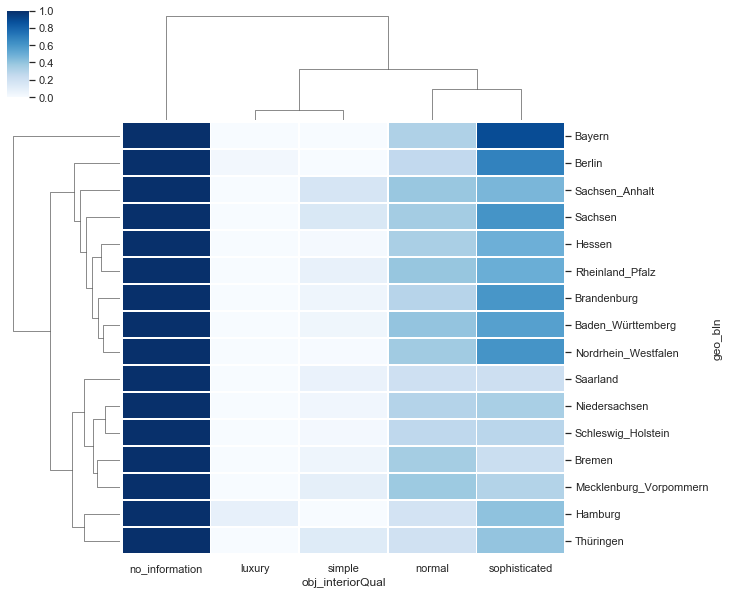

In [138]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Amount of houses by Region and interior quality

Bayern, Berlin, Brandenburg, Sachsen and NRW (Nordrhein-Westfalen) tend to have more sophisticated interior quality.

In [78]:
grouped = df_full.groupby(['obj_interiorQual','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_interiorQual', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_interiorQual,luxury,no_information,normal,simple,sophisticated
geo_bln,,,,,
Baden_Württemberg,1407089.33,565284.54,558451.47,375313.83,651400.33
Bayern,1861004.37,713121.59,580882.97,374239.68,705543.79
Berlin,2896551.79,1274415.25,802140.22,1615682.52,968690.28
Brandenburg,1298405.88,411330.39,346262.13,206556.15,456540.05
Bremen,877533.20,403341.68,335987.11,346163.24,444360.64
Hamburg,2256047.50,970984.42,750352.99,504038.46,982291.33
Hessen,1797895.40,522347.90,467881.82,247476.38,629608.74
Mecklenburg_Vorpommern,1014679.15,293822.29,290884.98,140661.91,439243.77
Niedersachsen,854966.58,330632.09,296495.07,179444.98,416461.41


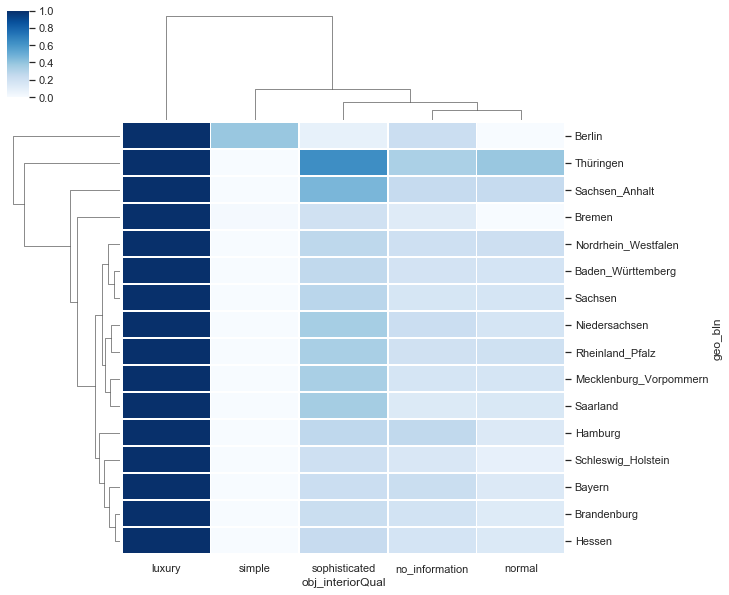

In [79]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Average price of houses by Region and interior quality

Ok, clearly the luxury sector is the most expensive. Berlin has more expensive prices in the simple category. 

## Accessories

In [80]:
grouped = df_full.groupby('obj_firingTypes').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_firingTypes').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_firingTypes','URL']], left_on='obj_firingTypes', right_on='obj_firingTypes')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

,obj_firingTypes,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,obj_picturecount,obj_pricetrendrent,obj_thermalChar,...,obj_lastRefurbish,obj_yearConstructed,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,gas,523318.97,215.07,1046.95,2.46,7.13,2.33,16.13,4.14,156.18,...,2010.15,1964.14,369.87,4.36,2873.49,2759.08,1590.21,71.11,866.08,36251
1,no_information,427777.44,229.65,1719.99,2.74,6.58,2.10,9.90,4.03,117.52,...,2006.99,1965.71,311.44,4.64,2500.12,2614.92,1867.41,69.23,640.56,26609
2,oil,473781.60,213.13,1922.30,2.65,7.34,2.24,17.80,3.93,192.03,...,2008.10,1955.08,360.74,4.19,2761.25,2351.58,827.43,67.36,487.33,19096
3,electricity,412102.23,160.44,988.02,2.09,5.82,2.13,14.66,4.10,129.39,...,2006.97,1972.44,345.52,4.16,2716.64,2580.26,7767.45,69.25,532.97,4973
4,solar_heating,545976.65,179.42,1323.53,11.30,5.85,2.09,18.48,4.32,65.55,...,2012.40,2002.73,488.69,5.09,3980.28,3046.14,1611.88,68.81,541.36,2865
5,geothermal,661146.96,178.73,1679.10,2.31,5.77,2.03,14.93,4.50,33.93,...,2014.09,2009.89,375.50,4.41,2994.07,3432.28,1449.55,67.94,590.36,1934
6,natural_gas_light,608891.60,219.97,1309.57,2.58,7.59,2.36,17.12,4.36,146.78,...,2009.95,1966.63,354.89,4.04,2731.40,2864.29,1150.40,74.93,905.57,1456
7,district_heating,725887.51,237.28,706.51,2.38,7.75,2.55,14.80,3.80,121.55,...,2012.21,1981.32,361.00,4.19,2805.08,3373.09,2591.68,77.30,1635.03,1445
8,environmental_thermal_energy,529165.22,155.06,615.60,1.72,6.14,2.19,10.74,4.51,29.66,...,2016.87,2015.77,342.31,4.67,2729.97,3361.02,1610.48,70.66,699.74,1094
9,pellet_heating,583173.74,216.63,1813.10,2.70,7.15,2.41,17.55,4.00,143.85,...,2012.31,1962.26,402.47,4.54,3116.26,2790.63,1107.62,65.19,569.61,1011


In [81]:
grouped = df_full.groupby(['obj_firingTypes','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_firingTypes','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_firingTypes','geo_bln'], right_on=['obj_firingTypes','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_firingTypes','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_firingTypes', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_firingTypes,bio_energy,coal,coal_coke,combined_heat_and_power_bio_energy,combined_heat_and_power_fossil_fuels,combined_heat_and_power_regenerative_energy,combined_heat_and_power_renewable_energy,district_heating,electricity,environmental_thermal_energy,...,natural_gas_heavy,natural_gas_light,no_information,oil,pellet_heating,solar_heating,steam_district_heating,wind_energy,wood,wood_chips
geo_bln,,,,,,,,,,,,,,,,,,,,,
Baden_Württemberg,14.00,8.00,3.00,0.00,2.00,1.00,3.00,212.00,884.00,111.00,...,19.00,125.00,2756.00,3132.00,167.00,500.00,7.00,0.00,143.00,12.00
Bayern,35.00,12.00,1.00,1.00,5.00,7.00,8.00,166.00,816.00,217.00,...,31.00,130.00,3656.00,3425.00,257.00,516.00,2.00,1.00,152.00,33.00
Berlin,0.00,1.00,0.00,0.00,15.00,6.00,1.00,42.00,28.00,13.00,...,19.00,70.00,396.00,301.00,10.00,34.00,0.00,3.00,3.00,0.00
Brandenburg,0.00,49.00,6.00,0.00,0.00,7.00,5.00,50.00,191.00,50.00,...,15.00,97.00,1230.00,399.00,20.00,93.00,0.00,0.00,44.00,1.00
Bremen,0.00,0.00,1.00,0.00,1.00,0.00,0.00,35.00,8.00,0.00,...,4.00,18.00,110.00,118.00,2.00,7.00,0.00,0.00,0.00,0.00
Hamburg,0.00,0.00,0.00,0.00,1.00,0.00,0.00,37.00,28.00,10.00,...,2.00,22.00,316.00,133.00,10.00,17.00,1.00,0.00,0.00,0.00
Hessen,6.00,3.00,1.00,0.00,3.00,3.00,4.00,112.00,423.00,114.00,...,26.00,103.00,2242.00,1956.00,111.00,139.00,3.00,0.00,48.00,0.00
Mecklenburg_Vorpommern,3.00,42.00,4.00,0.00,0.00,0.00,0.00,43.00,150.00,21.00,...,19.00,84.00,748.00,356.00,6.00,36.00,0.00,0.00,29.00,4.00
Niedersachsen,13.00,5.00,0.00,0.00,5.00,0.00,7.00,125.00,343.00,81.00,...,18.00,222.00,2730.00,1726.00,61.00,224.00,2.00,0.00,41.00,4.00


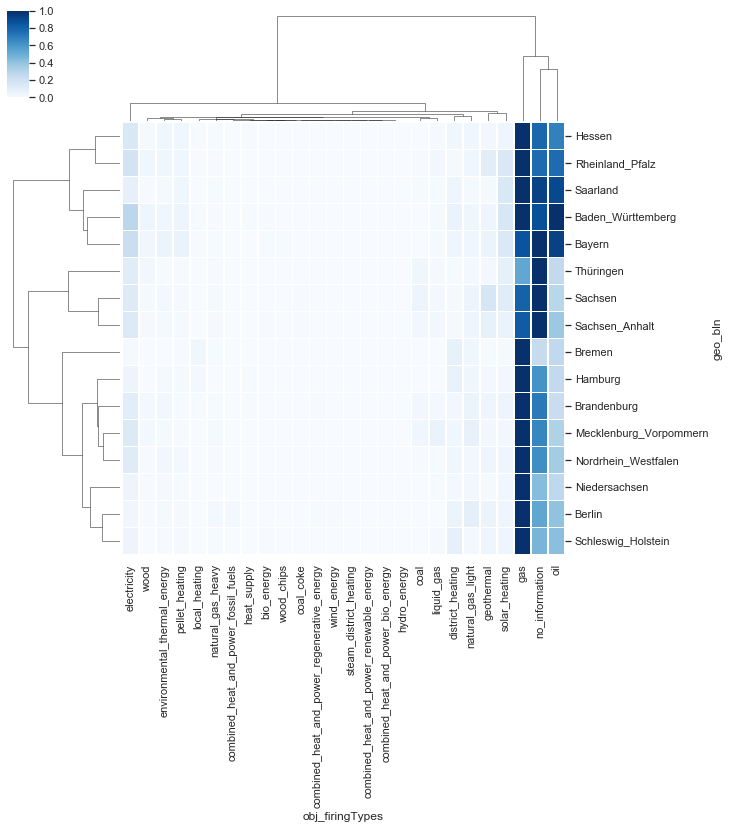

In [82]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Amount of houses by Region and firing types

Clearly there is a clear tendency to gas but in the Saarland, Baden-Württemberg and Bayern people use more Oil-heating. That is not so much used in the other regions. 

In [83]:
grouped = df_full.groupby(['obj_firingTypes','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_firingTypes', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_firingTypes,bio_energy,coal,coal_coke,combined_heat_and_power_bio_energy,combined_heat_and_power_fossil_fuels,combined_heat_and_power_regenerative_energy,combined_heat_and_power_renewable_energy,district_heating,electricity,environmental_thermal_energy,...,natural_gas_heavy,natural_gas_light,no_information,oil,pellet_heating,solar_heating,steam_district_heating,wind_energy,wood,wood_chips
geo_bln,,,,,,,,,,,,,,,,,,,,,
Baden_Württemberg,654857.14,175750.00,391550.00,0.00,548450.00,597000.00,861666.67,936686.44,491183.47,573106.21,...,1097868.42,812279.20,531926.74,573692.66,623417.37,613811.72,1235000.00,0.00,308311.87,1132416.67
Bayern,654834.29,296416.67,378000.00,950000.00,1474100.00,603235.71,877596.12,1079794.28,606030.77,710608.78,...,988961.29,1038430.00,667077.11,660952.97,796810.50,791223.18,1215000.00,470000.00,371942.17,771900.00
Berlin,0.00,169000.00,0.00,0.00,569789.33,661000.00,513000.00,2766857.14,645641.43,758450.00,...,675521.05,1149155.70,1235914.44,1089519.26,1697699.20,1222300.50,0.00,439366.67,813966.67,0.00
Brandenburg,0.00,145734.67,154466.67,0.00,0.00,423628.97,1000960.00,550931.26,332739.11,508298.76,...,425193.33,504208.81,364503.40,366558.36,346850.00,524819.57,0.00,0.00,324511.36,492000.00
Bremen,0.00,0.00,550000.00,0.00,247900.00,0.00,0.00,343438.57,275000.00,0.00,...,351000.00,435600.00,357972.72,444917.69,649500.00,331571.43,0.00,0.00,0.00,0.00
Hamburg,0.00,0.00,0.00,0.00,1550000.00,0.00,0.00,853042.16,675103.57,536850.00,...,400000.00,1415363.64,915079.69,851060.15,1766000.00,1976290.59,1799000.00,0.00,0.00,0.00
Hessen,486631.67,195166.67,20500.00,0.00,456666.67,493333.33,728500.00,705599.09,482481.09,689310.93,...,1059844.23,733334.95,460432.13,455770.90,447032.25,575192.89,985666.67,0.00,212576.42,0.00
Mecklenburg_Vorpommern,236666.67,77033.33,79000.00,0.00,0.00,0.00,0.00,449225.67,247882.60,317037.24,...,669421.05,275314.29,263264.96,322903.33,436156.33,470206.28,0.00,0.00,163140.00,208250.00
Niedersachsen,377538.46,94000.00,0.00,0.00,519588.00,0.00,346169.14,474721.63,290534.15,417085.67,...,485138.89,418277.48,314659.43,313137.89,411632.77,437512.85,559500.00,0.00,188009.76,355000.00


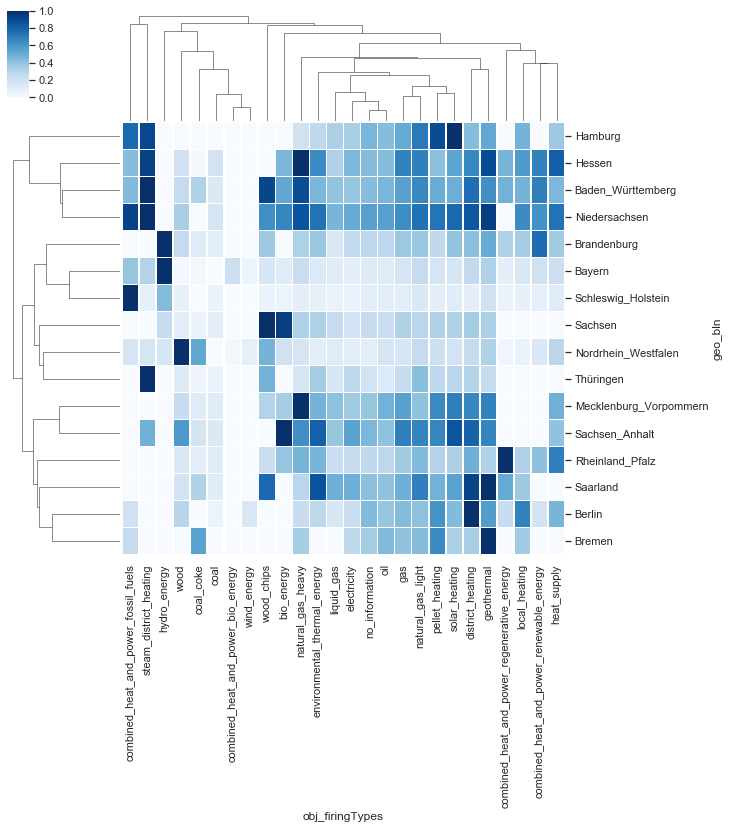

In [84]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Average price of houses by Region and firing types

No clear pattern visible.

In [85]:
grouped = df_full.groupby('obj_heatingType').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_heatingType').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_heatingType','URL']], left_on='obj_heatingType', right_on='obj_heatingType')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

,obj_heatingType,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,obj_picturecount,obj_pricetrendrent,obj_thermalChar,...,obj_lastRefurbish,obj_yearConstructed,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,central_heating,507984.51,216.43,1480.76,2.59,7.23,2.28,16.75,4.04,163.02,...,2009.38,1960.90,375.67,4.34,2906.11,2659.79,1519.95,69.76,710.30,42325
1,floor_heating,596753.12,171.71,893.92,5.56,5.48,2.15,14.71,4.46,61.83,...,2014.12,2008.76,424.38,4.89,3417.57,3398.50,1683.95,71.01,667.49,10101
2,gas_heating,509264.72,226.49,1025.68,2.31,6.85,2.26,16.01,4.23,147.14,...,2010.64,1967.60,339.00,4.23,2626.06,2729.63,1469.75,71.19,793.66,8798
3,no_information,483025.53,269.93,1908.76,2.42,6.56,2.14,12.84,4.44,145.80,...,2010.40,1979.16,323.07,5.87,2562.28,3177.13,3370.66,68.07,640.17,7889
4,heat_pump,565729.66,156.96,904.16,1.86,5.24,2.05,10.99,4.25,33.09,...,2015.80,2014.93,358.11,4.64,2898.95,3556.06,7696.67,69.96,615.33,4953
5,oil_heating,489230.39,214.97,2185.97,2.69,7.55,2.24,18.15,3.96,190.26,...,2008.83,1955.21,332.86,3.80,2534.98,2398.41,978.04,66.53,550.37,4358
6,stove_heating,230235.38,167.70,1728.77,2.47,6.52,2.10,15.61,3.87,241.82,...,2002.00,1921.89,324.31,3.54,2490.15,1531.23,612.67,63.96,314.63,2545
7,self_contained_central_heating,539683.86,271.82,854.67,3.01,9.88,2.60,15.35,3.76,180.47,...,2008.92,1935.29,348.42,4.47,2681.64,2362.43,1514.92,73.83,1521.09,2346
8,district_heating,739006.17,260.02,1044.12,2.45,8.37,2.60,14.45,3.97,126.40,...,2011.99,1979.04,347.72,4.17,2690.70,3234.80,2763.35,76.64,1732.55,1086
9,electric_heating,287814.82,157.28,1072.66,2.24,6.12,2.14,15.29,4.09,169.33,...,2005.82,1942.43,296.85,3.88,2266.03,1929.34,619.23,68.18,400.80,834


In [86]:
grouped = df_full.groupby(['obj_heatingType','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_heatingType','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_heatingType','geo_bln'], right_on=['obj_heatingType','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_heatingType','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_heatingType', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_heatingType,central_heating,combined_heat_and_power_plant,district_heating,electric_heating,floor_heating,gas_heating,heat_pump,night_storage_heater,no_information,oil_heating,self_contained_central_heating,solar_heating,stove_heating,wood_pellet_heating
geo_bln,,,,,,,,,,,,,,
Baden_Württemberg,4794.00,93.00,147.00,162.00,1415.00,745.00,631.00,131.00,672.00,529.00,246.00,29.00,448.00,57.00
Bayern,5531.00,43.00,88.00,101.00,1892.00,716.00,1147.00,65.00,861.00,594.00,150.00,25.00,429.00,83.00
Berlin,805.00,9.00,31.00,4.00,263.00,163.00,77.00,4.00,204.00,108.00,80.00,3.00,1.00,3.00
Brandenburg,1493.00,13.00,36.00,40.00,657.00,428.00,186.00,14.00,1029.00,130.00,86.00,5.00,134.00,3.00
Bremen,367.00,19.00,35.00,3.00,35.00,125.00,6.00,0.00,23.00,36.00,47.00,3.00,6.00,0.00
Hamburg,431.00,32.00,40.00,5.00,176.00,137.00,10.00,3.00,59.00,43.00,5.00,4.00,3.00,2.00
Hessen,3702.00,76.00,64.00,80.00,644.00,711.00,507.00,39.00,567.00,465.00,156.00,11.00,149.00,47.00
Mecklenburg_Vorpommern,1221.00,0.00,30.00,36.00,237.00,263.00,59.00,30.00,287.00,116.00,40.00,4.00,118.00,4.00
Niedersachsen,5898.00,30.00,123.00,66.00,849.00,1522.00,252.00,71.00,609.00,455.00,276.00,18.00,169.00,26.00


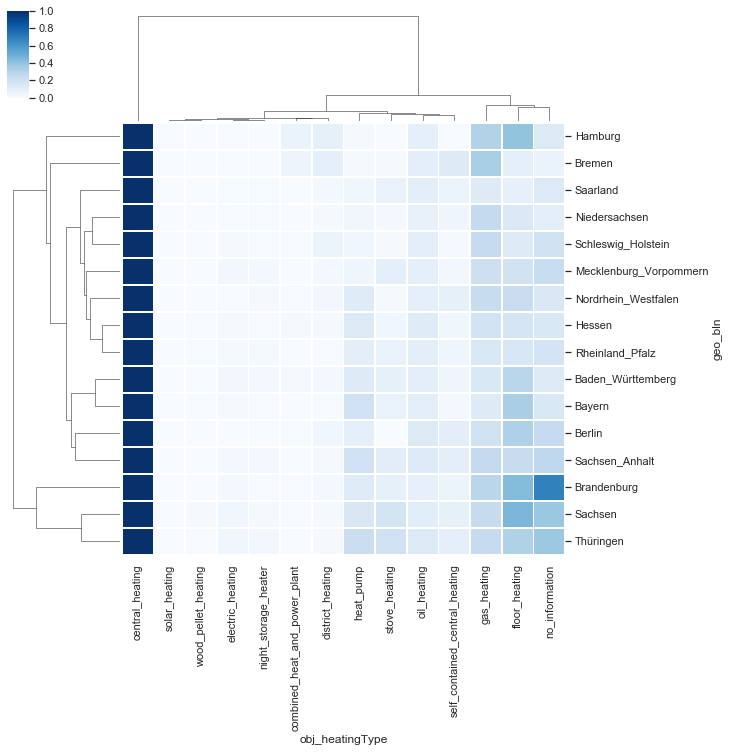

In [87]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Amount of houses by Region and heating types

Most of the homes use central heating. Sachsen and Hamburg do use also more floor heating.

In [88]:
grouped = df_full.groupby(['obj_heatingType','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_heatingType', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_heatingType,central_heating,combined_heat_and_power_plant,district_heating,electric_heating,floor_heating,gas_heating,heat_pump,night_storage_heater,no_information,oil_heating,self_contained_central_heating,solar_heating,stove_heating,wood_pellet_heating
geo_bln,,,,,,,,,,,,,,
Baden_Württemberg,649405.65,642607.85,998794.22,457171.98,615730.81,653359.58,556511.89,410368.32,568234.77,602155.77,659079.43,842300.14,361229.35,757098.25
Bayern,719589.72,812426.05,1174307.48,473928.71,811809.96,858800.90,777510.25,433323.08,695029.18,727964.61,721853.17,1114150.40,370952.79,621797.59
Berlin,1220992.24,541871.11,3366516.13,484975.00,860072.56,1009049.74,786124.68,718500.00,1100533.20,1141381.48,1775438.06,733200.00,729000.00,643333.33
Brandenburg,502828.01,456866.92,767772.38,144308.89,526367.20,454684.48,480531.71,127785.71,352681.50,305369.13,548719.51,534985.60,156061.46,91666.67
Bremen,403833.27,354298.42,342490.00,187266.67,463665.14,415042.39,329770.83,0.00,377763.04,464111.06,425245.11,1178000.00,581666.67,0.00
Hamburg,1043978.12,810601.56,831085.03,506400.00,893879.70,1248874.56,835898.00,336300.00,1460376.73,793883.72,762200.00,1605000.00,2058333.33,982500.00
Hessen,605061.49,523319.61,746715.16,235114.98,729220.86,624659.72,671712.15,207171.79,665757.51,495906.34,894117.11,705527.27,186339.18,401171.91
Mecklenburg_Vorpommern,348852.74,0.00,507914.13,177063.86,430642.26,327206.08,399486.31,225476.67,274718.81,280595.74,316954.60,515750.00,113578.60,183500.00
Niedersachsen,348646.48,763815.87,482330.72,173139.38,416072.37,360059.35,458927.19,171271.83,332742.58,330448.56,430372.83,344205.50,188442.51,499823.08


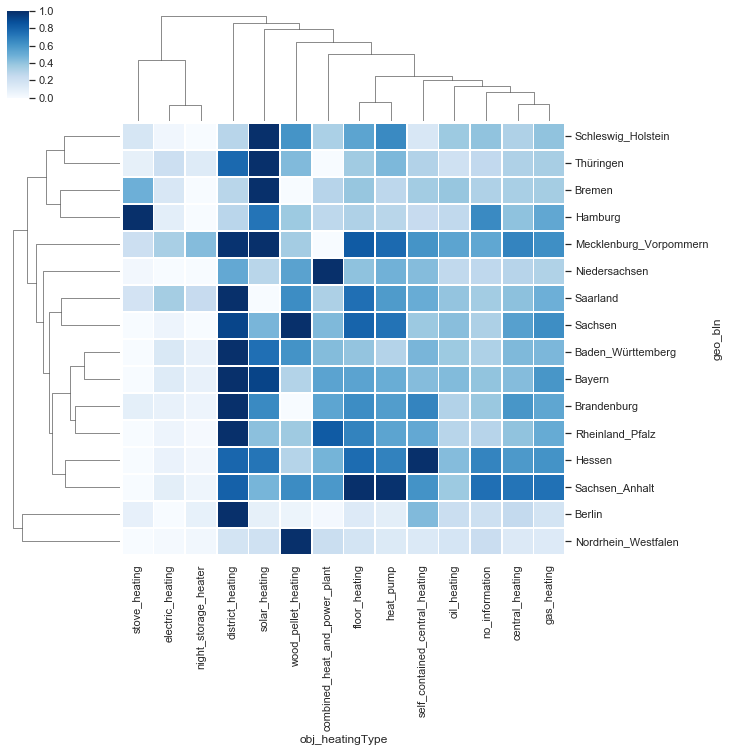

In [89]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Average price of houses by Region and heating types

District heating is by far the most expensive. Solar heating seems to be expensive as well. Stove heating is interesting, since it is being used in Saarland, Mecklenburg Vorpommern, Hamburg and Bremen. It is mostn expensive in Bremen. 

In [90]:
grouped = df_full.groupby('obj_cellar').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_cellar').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_cellar','URL']], left_on='obj_cellar', right_on='obj_cellar')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

,obj_cellar,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,obj_picturecount,obj_pricetrendrent,obj_thermalChar,...,obj_lastRefurbish,obj_yearConstructed,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,False,434802.24,214.14,1558.88,3.18,6.48,2.07,12.84,4.16,138.69,...,2008.88,1971.37,339.84,4.50,2698.74,2534.12,2200.50,67.53,601.96,63593
1,True,565158.50,217.80,1292.45,2.51,7.35,2.40,16.89,4.03,167.61,...,2009.41,1960.14,368.54,4.45,2843.18,2963.31,1553.95,71.77,831.94,44279


In [139]:
grouped = df_full.groupby(['obj_cellar','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_cellar','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_cellar','geo_bln'], right_on=['obj_cellar','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_cellar','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_cellar', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_cellar,False,True
geo_bln,,
Baden_Württemberg,5819,6443
Bayern,7585,6545
Berlin,1048,908
Brandenburg,3779,1367
Bremen,472,333
Hamburg,641,550
Hessen,4273,4660
Mecklenburg_Vorpommern,2352,690
Niedersachsen,8683,4082


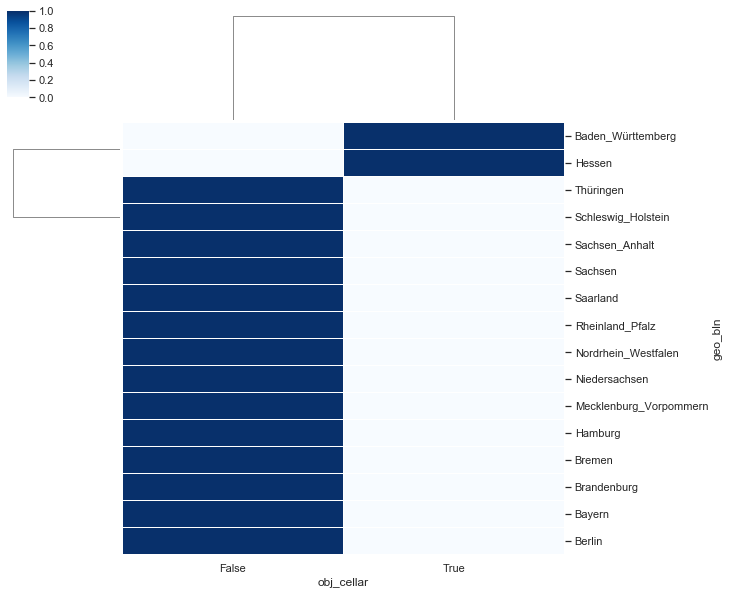

In [141]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Amount of houses by Region and cellar

A cellar seems to be something special, since the houses without a cellar outnumber the houses with a cellar. Only in Baden-Württemberg and Hessen are more cellars. 

In [93]:
grouped = df_full.groupby(['obj_cellar','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_cellar', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_cellar,False,True
geo_bln,,
Baden_Württemberg,556064.29,638268.59
Bayern,611818.63,841169.45
Berlin,1237490.32,1134358.96
Brandenburg,394862.44,494310.87
Bremen,402670.16,398720.38
Hamburg,997984.44,1040681.21
Hessen,500666.13,639566.21
Mecklenburg_Vorpommern,312313.12,340867.95
Niedersachsen,335337.46,365416.28


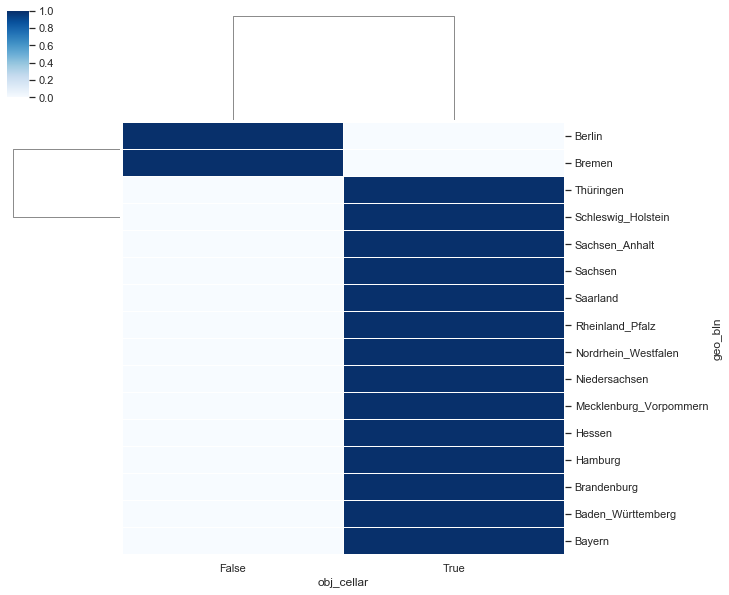

In [94]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Average price of houses by Region and cellar

The cellar has also implications on the price, since it is usually more expensive (except in Berlin and Bremen). The difference in pricing is very small in Berlin and Bremen.

In [95]:
grouped = df_full.groupby('obj_barrierFree').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_barrierFree').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_barrierFree','URL']], left_on='obj_barrierFree', right_on='obj_barrierFree')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

,obj_barrierFree,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,obj_picturecount,obj_pricetrendrent,obj_thermalChar,...,obj_lastRefurbish,obj_yearConstructed,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,False,484127.69,216.75,1449.12,2.83,6.88,2.25,14.41,4.10,155.56,...,2009.05,1965.05,350.63,4.49,2745.82,2695.72,1908.11,69.49,701.14,102277
1,True,564772.98,195.42,1456.73,2.57,6.15,2.04,16.21,4.26,108.09,...,2012.02,1991.82,369.75,4.20,2981.16,2978.33,2422.13,69.29,610.67,5595


In [142]:
grouped = df_full.groupby(['obj_barrierFree','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_barrierFree','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_barrierFree','geo_bln'], right_on=['obj_barrierFree','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_barrierFree','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_barrierFree', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_barrierFree,False,True
geo_bln,,
Baden_Württemberg,11672,590
Bayern,13013,1117
Berlin,1864,92
Brandenburg,4909,237
Bremen,778,27
Hamburg,1150,41
Hessen,8574,359
Mecklenburg_Vorpommern,2934,108
Niedersachsen,12068,697


C:\Users\d6002091\Downloads\Programs\Anaconda3\lib\site-packages\seaborn\matrix.py:682: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set_xlim(0, max_dependent_coord * 1.05)


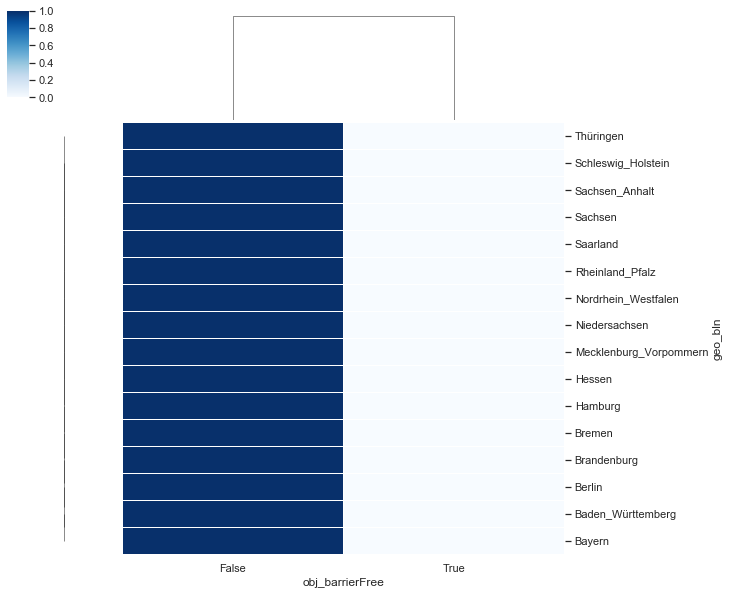

In [144]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Amount of houses by Region and barrier free

Most of the houses are not barrier free. 

## Time

In [98]:
#Transform method taking points as param
def transform_years(years):
    if years < 1500:
        return "Before 1500"
    elif years >= 1500 and years < 1600:
        return "1500-1599" 
    elif years >= 1600 and years < 1700:
        return "1600-1699"  
    elif years >= 1700 and years < 1800:
        return "1700-1799" 
    elif years >= 1800 and years < 1850:
        return "1800-1849" 
    elif years >= 1850 and years < 1900:
        return "1850-1899" 
    elif years >= 1900 and years < 1910:
        return "1900-1909" 
    elif years >= 1910 and years < 1920:
        return "1910-1919" 
    elif years >= 1920 and years < 1930:
        return "1920-1929" 
    elif years >= 1920 and years < 1930:
        return "1920-1929" 
    elif years >= 1930 and years < 1940:
        return "1930-1939" 
    elif years >= 1940 and years < 1950:
        return "1940-1949" 
    elif years >= 1950 and years < 1960:
        return "1950-1959" 
    elif years >= 1960 and years < 1970:
        return "1960-1969" 
    elif years >= 1970 and years < 1980:
        return "1970-1979" 
    elif years >= 1980 and years < 1990:
        return "1980-1989" 
    elif years >= 1990 and years < 2000:
        return "1990-1999" 
    elif years >= 2000 and years < 2010:
        return "2000-2009" 
    elif years >= 2010 and years <= 2019:
        return "2010-2019"
    elif years > 2019:
        return "Future"
    else:
        return "Not known"

#Applying transform method and assigning result to new column "points_simplified"
df_full = df_full.assign(Constructed_years_category = df_full['obj_yearConstructed'].apply(transform_years))
df_full[['obj_yearConstructed','Constructed_years_category']].head(10)

,obj_yearConstructed,Constructed_years_category
0,1964.00,1960-1969
1,1975.00,1970-1979
2,1962.00,1960-1969
3,1973.00,1970-1979
4,1994.00,1990-1999
5,2019.00,2010-2019
6,nan,Not known
7,1900.00,1900-1909
8,1955.00,1950-1959
9,1973.00,1970-1979


## ↑ For construction year, we need to categorize the data first

In [99]:
grouped = df_full.groupby('Constructed_years_category').mean()
grouped = grouped[['obj_yearConstructed','obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('Constructed_years_category').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['Constructed_years_category','URL']], left_on='Constructed_years_category', right_on='Constructed_years_category')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('obj_yearConstructed', ascending=False).reset_index(drop="True")
grouped

,Constructed_years_category,obj_yearConstructed,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,obj_picturecount,obj_pricetrendrent,...,obj_usableArea,obj_lastRefurbish,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,Future,2020.69,499081.48,184.56,917.05,2.49,5.16,2.11,12.12,4.41,...,99.18,2019.82,425.18,5.14,3482.78,3290.62,2815.65,70.55,639.35,7045
1,2010-2019,2017.43,559528.46,171.41,771.68,4.76,5.33,2.13,12.82,4.40,...,93.78,2016.36,382.31,5.76,3050.47,3295.17,4406.56,68.73,633.20,13160
2,2000-2009,2003.78,642340.58,199.01,1345.65,2.47,6.20,2.28,16.83,4.43,...,105.03,2013.88,374.43,4.61,2908.47,3271.93,1280.69,68.84,670.33,6722
3,1990-1999,1994.95,540100.48,208.99,1460.96,2.64,6.75,2.29,16.70,4.31,...,119.55,2013.18,367.09,4.52,2835.58,2790.46,1865.26,68.02,530.71,7845
4,1980-1989,1983.84,536807.62,208.18,1277.74,2.45,6.80,2.23,16.91,4.14,...,127.78,2011.53,364.37,4.34,2815.17,2900.93,1079.58,70.12,660.98,6371
5,1970-1979,1974.45,491555.49,206.96,1266.95,2.37,6.89,2.12,16.69,4.01,...,116.25,2009.75,360.63,4.20,2774.18,2597.30,2004.01,69.68,636.58,9569
6,1960-1969,1964.23,486886.64,231.38,1468.91,2.46,7.37,2.23,15.47,4.00,...,122.19,2009.15,345.28,4.44,2660.17,2501.90,1169.68,71.70,803.67,9298
7,1950-1959,1954.58,421616.44,194.44,1245.52,2.45,7.23,2.37,14.75,3.79,...,132.60,2008.01,329.68,4.26,2542.79,2279.24,783.50,71.35,993.17,6886
8,1940-1949,1945.32,351789.03,188.01,2391.59,2.78,6.88,2.26,14.17,3.79,...,147.61,2006.77,319.20,3.79,2460.69,1943.64,1053.06,70.28,849.64,1209
9,1930-1939,1933.97,404472.60,184.87,1349.66,2.45,6.92,2.27,14.76,4.25,...,155.13,2006.90,332.46,3.98,2558.33,2365.19,757.53,72.71,936.38,4542


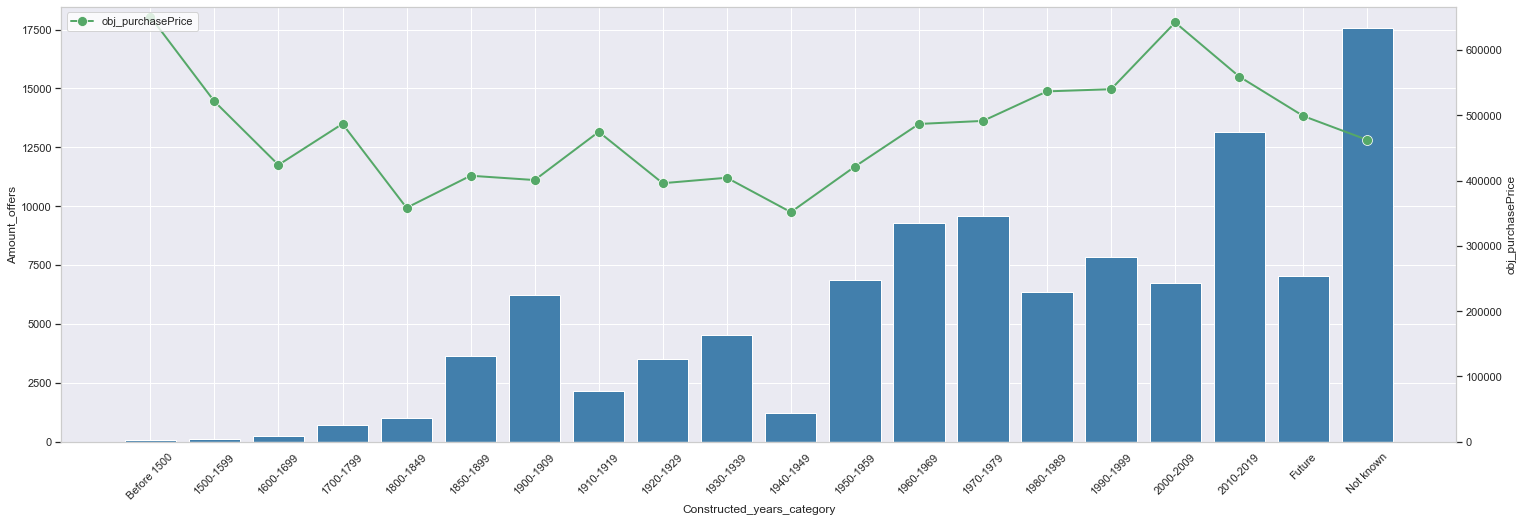

In [100]:
sns.set(font_scale = 1.2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 2, 'lines.markersize': 10})
plt.figure(figsize=(25,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('obj_yearConstructed')
ax= sns.barplot(x = 'Constructed_years_category', y = 'Amount_offers',  label='Amount_offers', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'Constructed_years_category', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
ax.xaxis.grid(True)
plt.show()

(1800, 2020)

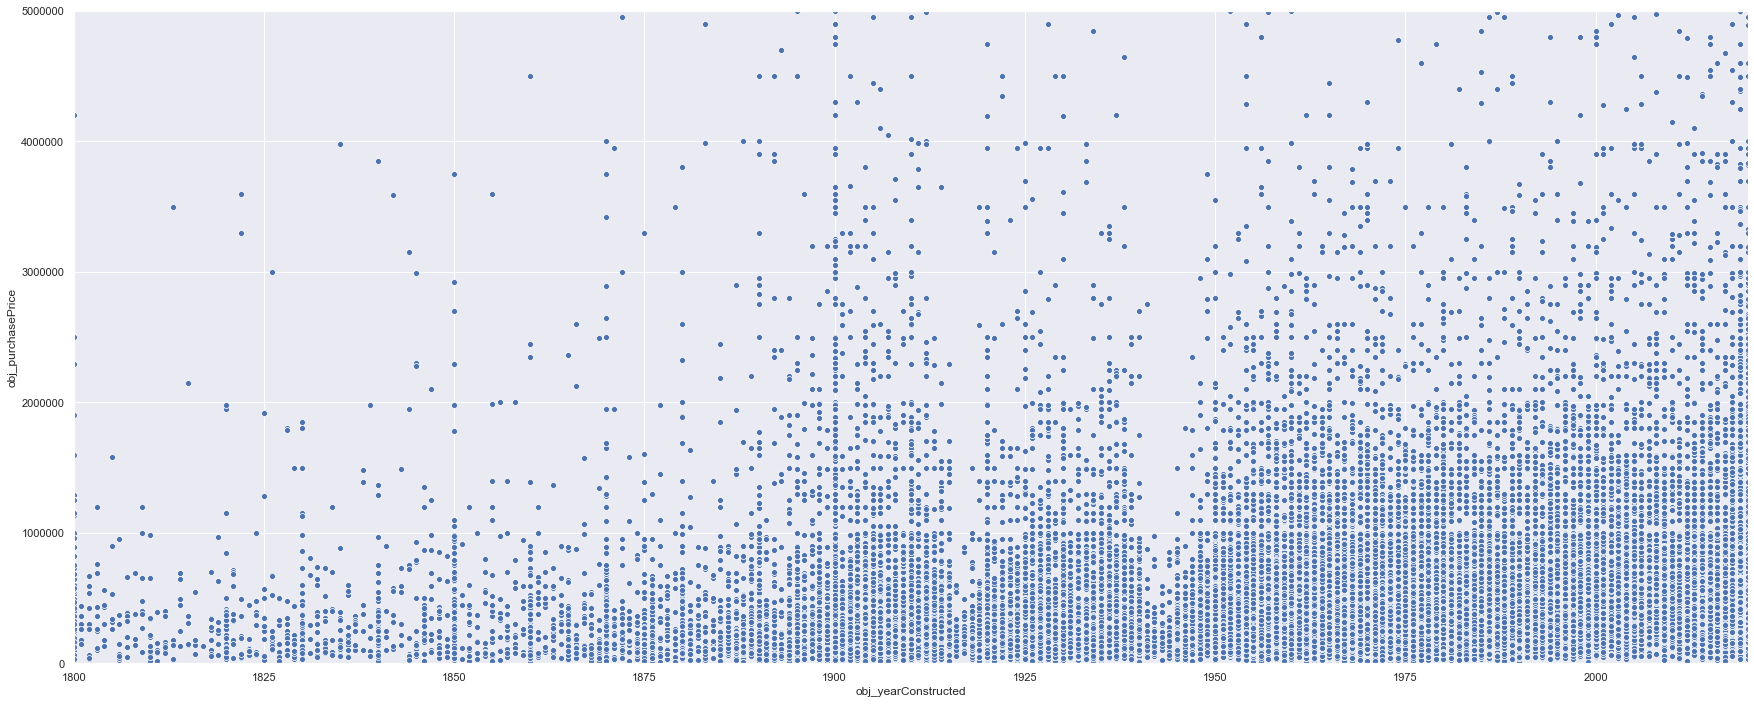

In [101]:
sns.set(font_scale = 1)
plt.figure(figsize=(30,12))
sns.scatterplot(x = 'obj_yearConstructed', y = 'obj_purchasePrice', data=df_full)
plt.ylim(0, 5000000)
plt.xlim(1800, 2020)

## ↑ Houses by construction year

Interesting! Do you see the drope between 1900-1925 and 1925-1950. That is due to the first and second WW. Also we see that many houses have been constructed in the year 1900. We dont know if this is true or just being claimed by the owner ;).

In [102]:
grouped = df_full.groupby(['Constructed_years_category','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['Constructed_years_category','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['Constructed_years_category','geo_bln'], right_on=['Constructed_years_category','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['Constructed_years_category','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='Constructed_years_category', values='Amount_offers')
grouped = grouped.reindex_axis(['Before 1500','1500-1599', '1600-1699','1700-1799','1800-1849','1850-1899','1900-1909','1910-1919','1920-1929','1930-1939','1940-1949','1950-1959','1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019','Future','Not known'], axis=1)
grouped.fillna(0, inplace=True)
grouped

C:\Users\d6002091\Downloads\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  if __name__ == '__main__':


Constructed_years_category,Before 1500,1500-1599,1600-1699,1700-1799,1800-1849,1850-1899,1900-1909,1910-1919,1920-1929,1930-1939,1940-1949,1950-1959,1960-1969,1970-1979,1980-1989,1990-1999,2000-2009,2010-2019,Future,Not known
geo_bln,,,,,,,,,,,,,,,,,,,,
Baden_Württemberg,8.00,19.00,24.00,95.00,110.00,264.00,485.00,160.00,338.00,370.00,129.00,938.00,1362.00,1274.00,811.00,839.00,750.00,1339.00,833.00,2114.00
Bayern,7.00,20.00,24.00,60.00,89.00,215.00,371.00,101.00,229.00,373.00,115.00,764.00,1276.00,1365.00,1091.00,1026.00,937.00,1941.00,1165.00,2961.00
Berlin,0.00,0.00,1.00,1.00,1.00,39.00,96.00,33.00,86.00,208.00,12.00,72.00,116.00,119.00,151.00,150.00,179.00,268.00,117.00,307.00
Brandenburg,0.00,0.00,1.00,17.00,28.00,153.00,303.00,104.00,232.00,427.00,54.00,104.00,70.00,162.00,159.00,553.00,443.00,683.00,222.00,1431.00
Bremen,0.00,0.00,1.00,1.00,6.00,30.00,52.00,26.00,49.00,69.00,15.00,94.00,104.00,86.00,35.00,33.00,39.00,63.00,24.00,78.00
Hamburg,0.00,0.00,0.00,0.00,1.00,28.00,31.00,22.00,41.00,68.00,17.00,97.00,110.00,114.00,66.00,56.00,86.00,205.00,101.00,148.00
Hessen,5.00,27.00,43.00,127.00,87.00,262.00,475.00,137.00,279.00,292.00,87.00,560.00,972.00,1002.00,539.00,544.00,474.00,1040.00,646.00,1335.00
Mecklenburg_Vorpommern,4.00,1.00,3.00,23.00,44.00,166.00,266.00,92.00,97.00,191.00,45.00,128.00,72.00,140.00,118.00,354.00,293.00,304.00,67.00,634.00
Niedersachsen,3.00,14.00,27.00,74.00,148.00,463.00,592.00,230.00,280.00,435.00,108.00,894.00,1416.00,1498.00,897.00,1198.00,943.00,1612.00,492.00,1441.00


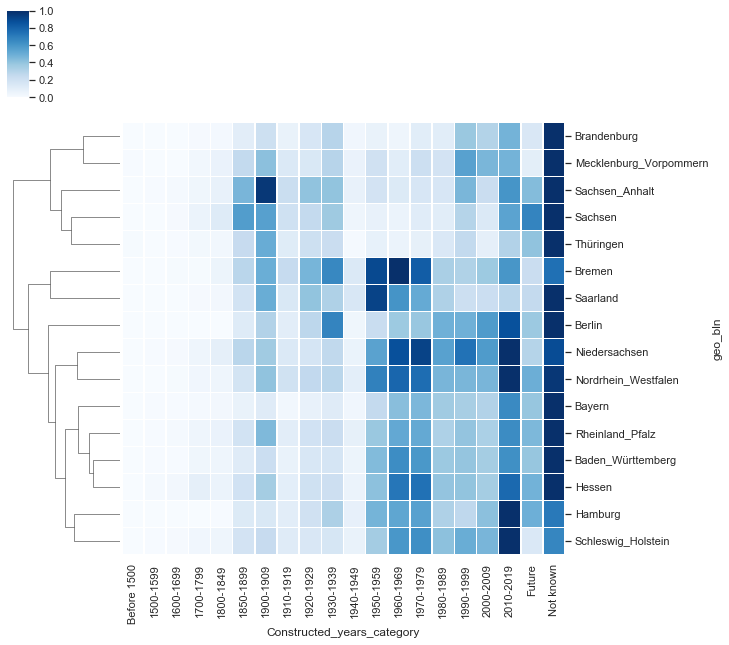

In [103]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0, col_cluster=False)

## ↑ Clustermap: Amount of houses by Region and construction year

This confirms the previous observation, between 1910-1919 and 1940-1949 there is almost no building activity. Interestingly: After WW2 the building activity starts again, but not in all regions. Eastern Germany (Brandenburg, Sachsen, Mecklenburg-Vorpommern, Thüringen, Sachsen-Anhalt and Berlin) seems to have less activity in those years. That could be due to the fact that the GDR did not pursued in building new family-houses after the second WW2.

Also interesting is the clustering on the side: One cluster for Brandenburg, Mecklenburg-Vorpommern, Sachsen Anhalt and Sachsen and the other regions in the other cluster.

In [114]:
grouped = df_full.groupby(['Constructed_years_category','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='Constructed_years_category', values='obj_purchasePrice')
grouped = grouped.reindex_axis(['Before 1500','1500-1599', '1600-1699','1700-1799','1800-1849','1850-1899','1900-1909','1910-1919','1920-1929','1930-1939','1940-1949','1950-1959','1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019','Future','Not known'], axis=1)
grouped.fillna(0, inplace=True)
grouped

C:\Users\d6002091\Downloads\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """


Constructed_years_category,Before 1500,1500-1599,1600-1699,1700-1799,1800-1849,1850-1899,1900-1909,1910-1919,1920-1929,1930-1939,1940-1949,1950-1959,1960-1969,1970-1979,1980-1989,1990-1999,2000-2009,2010-2019,Future,Not known
geo_bln,,,,,,,,,,,,,,,,,,,,
Baden_Württemberg,702250.00,644026.26,430958.33,521914.73,468163.64,579825.94,556735.03,660800.30,549262.90,607891.35,464159.32,559957.68,625819.27,616685.13,652049.59,657625.77,721215.08,643600.68,571137.15,519056.92
Bayern,952000.00,979174.95,779791.62,993281.67,587270.79,700695.11,567217.19,819171.29,557681.87,605342.27,590268.69,520299.24,674171.20,686937.52,789609.00,817307.75,980390.11,841230.34,783415.98,595910.40
Berlin,0.00,0.00,530000.00,1090000.00,6000000.00,2488474.36,2672541.67,2918152.73,1339145.99,1103756.21,534416.67,1039125.00,1179494.01,670524.32,1051512.52,913057.29,1135537.99,955201.76,695524.25,1271641.75
Brandenburg,0.00,0.00,48000.00,1051876.47,629482.14,406537.90,439298.06,475307.21,365565.47,364596.32,287465.72,228553.85,230387.84,210456.98,295562.25,506239.51,585535.11,496698.71,433370.51,374433.98
Bremen,0.00,0.00,510000.00,749000.00,486666.67,698166.67,481190.38,385766.54,346271.39,308157.83,244333.33,373776.59,327833.56,364486.98,404142.86,393424.24,541517.95,511864.27,463311.42,366326.82
Hamburg,0.00,0.00,0.00,0.00,599000.00,3031857.14,2392564.52,1562227.27,1405024.39,679970.88,601823.53,626563.92,836398.18,780926.02,947842.42,988598.21,795002.76,937829.31,723069.93,1422957.43
Hessen,462000.00,338144.44,433027.91,281936.61,381689.08,623013.36,503501.76,637480.88,425190.10,429138.77,289890.79,507090.31,620248.70,550704.73,559182.48,657806.04,889663.34,685595.91,528720.40,515048.19
Mecklenburg_Vorpommern,566400.00,45000.00,548166.67,463473.91,486818.18,349532.17,244728.40,375264.01,267735.57,207221.80,218848.89,204845.38,256717.71,233287.14,258019.49,353199.86,428506.47,458327.27,285922.87,289902.51
Niedersachsen,815000.00,391285.71,511666.67,338934.32,246620.27,299243.44,272565.40,322135.65,294075.17,277808.54,383015.08,278331.68,301892.05,342692.82,358485.73,389615.23,431127.96,384150.77,404374.28,346116.14


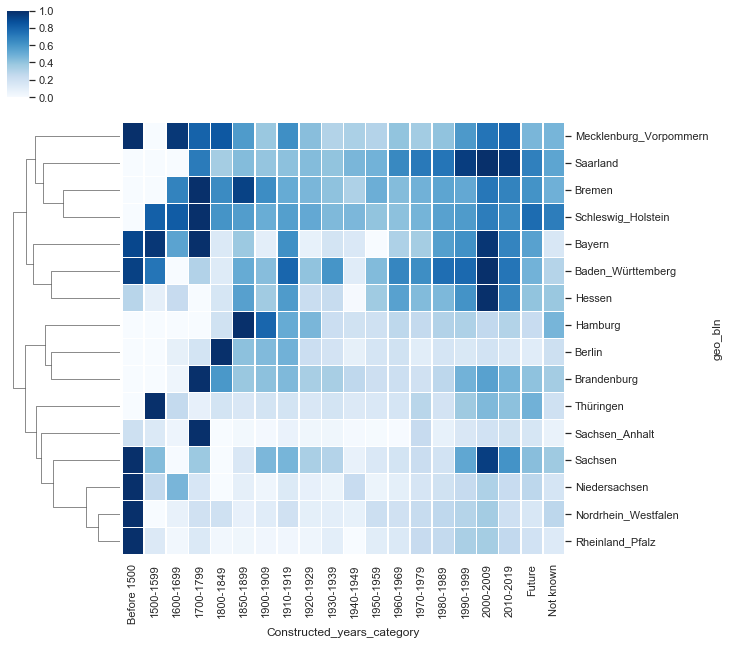

In [105]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0, col_cluster=False)

## ↑ Clustermap: Average price of houses by Region and construction year

Older houses (<1800) are more expensive. That could be due to the fact that these houses are old castles. Newer houses build 2000-2009 seem to be expensive as well.

In [106]:
grouped = df_full.groupby(['Constructed_years_category','geo_bln'])['obj_livingSpace'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='Constructed_years_category', values='obj_livingSpace')
grouped = grouped.reindex_axis(['Before 1500','1500-1599', '1600-1699','1700-1799','1800-1849','1850-1899','1900-1909','1910-1919','1920-1929','1930-1939','1940-1949','1950-1959','1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019','Future','Not known'], axis=1)
grouped.fillna(0, inplace=True)
grouped

C:\Users\d6002091\Downloads\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """


Constructed_years_category,Before 1500,1500-1599,1600-1699,1700-1799,1800-1849,1850-1899,1900-1909,1910-1919,1920-1929,1930-1939,1940-1949,1950-1959,1960-1969,1970-1979,1980-1989,1990-1999,2000-2009,2010-2019,Future,Not known
geo_bln,,,,,,,,,,,,,,,,,,,,
Baden_Württemberg,350.85,292.41,245.09,245.52,227.69,234.67,221.05,245.51,201.50,195.14,182.15,196.05,212.89,224.13,232.36,219.38,207.93,176.63,157.06,187.48
Bayern,562.29,403.72,456.76,339.32,262.15,265.37,232.92,293.11,210.68,180.51,194.39,190.81,410.34,210.75,215.32,216.03,204.93,168.16,159.05,277.40
Berlin,0.00,0.00,114.00,415.00,1200.00,455.95,629.87,688.70,267.91,184.76,131.17,247.61,258.12,158.84,223.18,219.12,217.29,184.38,147.01,274.23
Brandenburg,0.00,0.00,78.00,457.41,428.43,325.35,291.83,290.84,225.36,165.37,180.00,179.46,152.70,129.93,179.18,196.82,173.64,155.81,152.33,191.50
Bremen,0.00,0.00,86.00,115.00,270.00,237.15,415.51,238.71,146.45,152.91,121.16,172.85,144.34,159.39,161.49,151.33,178.35,178.39,147.58,198.47
Hamburg,0.00,0.00,0.00,0.00,148.00,493.04,312.81,268.74,222.00,147.97,130.38,132.32,173.83,184.83,190.52,194.28,157.27,170.21,142.94,196.50
Hessen,220.00,266.30,252.56,209.14,233.35,235.69,241.02,214.67,183.54,183.50,178.09,185.46,236.33,232.09,217.10,239.75,233.79,181.49,487.55,203.15
Mecklenburg_Vorpommern,223.22,220.00,369.67,460.50,462.84,278.32,233.06,289.50,233.75,184.71,158.68,174.54,248.19,149.80,179.41,190.42,173.09,166.69,114.90,194.65
Niedersachsen,258.34,259.28,309.12,269.12,213.88,253.01,244.49,247.83,207.27,196.02,224.86,175.03,198.15,193.69,186.55,193.75,185.57,152.34,161.80,202.99


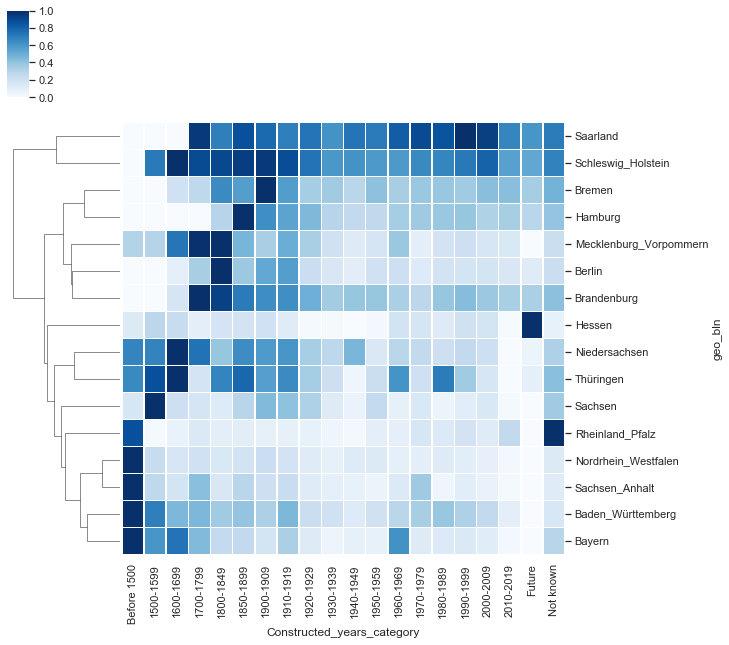

In [107]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0, col_cluster=False)

## ↑ Clustermap: Average size of houses by Region and construction year

In the old days, houses tended to be bigger than nowadays. An exception is Saarland and Schleswig Holstein, were houses are big throughout all the years. 

In [108]:
#Applying transform method and assigning result to new column "points_simplified"
df_full = df_full.assign(lastRefurbish_years_category = df_full['obj_lastRefurbish'].apply(transform_years))
df_full[['obj_lastRefurbish','lastRefurbish_years_category']].head(10)

,obj_lastRefurbish,lastRefurbish_years_category
0,nan,Not known
1,nan,Not known
2,nan,Not known
3,2015.00,2010-2019
4,nan,Not known
5,nan,Not known
6,nan,Not known
7,nan,Not known
8,nan,Not known
9,nan,Not known


In [109]:
grouped = df_full.groupby('lastRefurbish_years_category').mean()
grouped = grouped[['obj_lastRefurbish','obj_yearConstructed','obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('lastRefurbish_years_category').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['lastRefurbish_years_category','URL']], left_on='lastRefurbish_years_category', right_on='lastRefurbish_years_category')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('lastRefurbish_years_category', ascending=False).reset_index(drop="True")
grouped

,lastRefurbish_years_category,obj_lastRefurbish,obj_yearConstructed,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,obj_picturecount,...,obj_thermalChar,obj_usableArea,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,Not known,nan,1972.03,477944.13,214.12,1412.78,2.84,6.58,2.19,13.57,...,147.73,134.49,348.06,4.50,2749.15,2732.51,2082.45,69.24,682.73,83329
1,Future,2025.76,2015.51,641913.85,180.49,533.74,1.71,6.03,2.15,10.27,...,25.85,118.01,350.27,5.68,2809.90,3549.57,1805.66,76.65,739.84,157
2,Before 1500,762.00,1955.00,351000.00,150.00,161.50,0.00,5.00,0.67,2.00,...,nan,91.67,172.25,2.00,1118.75,1989.44,443.41,16.00,351.55,4
3,2010-2019,2015.59,1956.91,567815.90,223.64,1449.43,2.74,7.64,2.34,18.48,...,153.53,140.31,378.67,4.60,2907.01,2876.19,1606.52,70.31,781.63,15317
4,2000-2009,2004.76,1941.84,491803.63,216.67,1682.66,2.79,7.64,2.36,17.14,...,176.06,144.25,351.99,4.17,2691.55,2431.06,1126.67,70.69,714.57,5326
5,1990-1999,1994.97,1928.88,383569.84,225.40,2239.58,2.90,8.64,2.25,15.70,...,201.46,175.70,326.00,3.88,2484.57,1852.02,725.28,69.43,591.33,2686
6,1980-1989,1984.14,1924.90,411852.63,196.41,1265.80,2.62,7.29,2.26,15.48,...,238.43,129.18,318.71,4.09,2441.68,2118.57,2976.58,65.92,747.90,651
7,1970-1979,1974.30,1922.45,347346.51,197.28,1554.99,2.46,7.40,2.21,14.42,...,250.69,159.33,285.95,3.19,2181.73,1869.56,601.86,65.19,710.78,258
8,1960-1969,1963.97,1913.57,299137.50,177.22,972.09,1.96,6.71,2.22,13.17,...,283.23,144.43,274.25,2.45,2076.21,1642.46,2014.24,76.22,569.67,104
9,1950-1959,1953.45,1904.00,262500.00,165.93,814.75,2.09,7.20,2.24,12.95,...,286.02,146.43,235.55,3.60,1829.05,1983.50,580.62,69.62,638.94,20


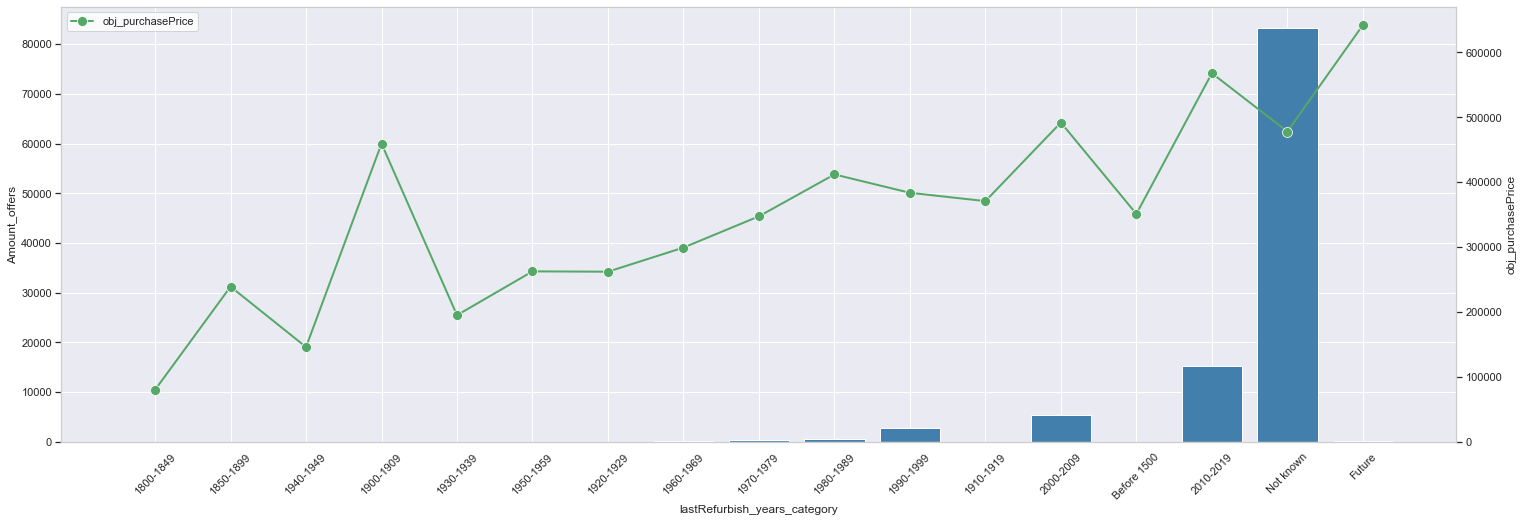

In [110]:
sns.set(font_scale = 1.2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 2, 'lines.markersize': 10})
plt.figure(figsize=(25,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('obj_yearConstructed')
ax= sns.barplot(x = 'lastRefurbish_years_category', y = 'Amount_offers',  label='Amount_offers', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'lastRefurbish_years_category', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
ax.xaxis.grid(True)
plt.show()

## ↑ Average price and amount by renovation year.

no clear pattern, except that the houses become more expensive

(1900, 2020)

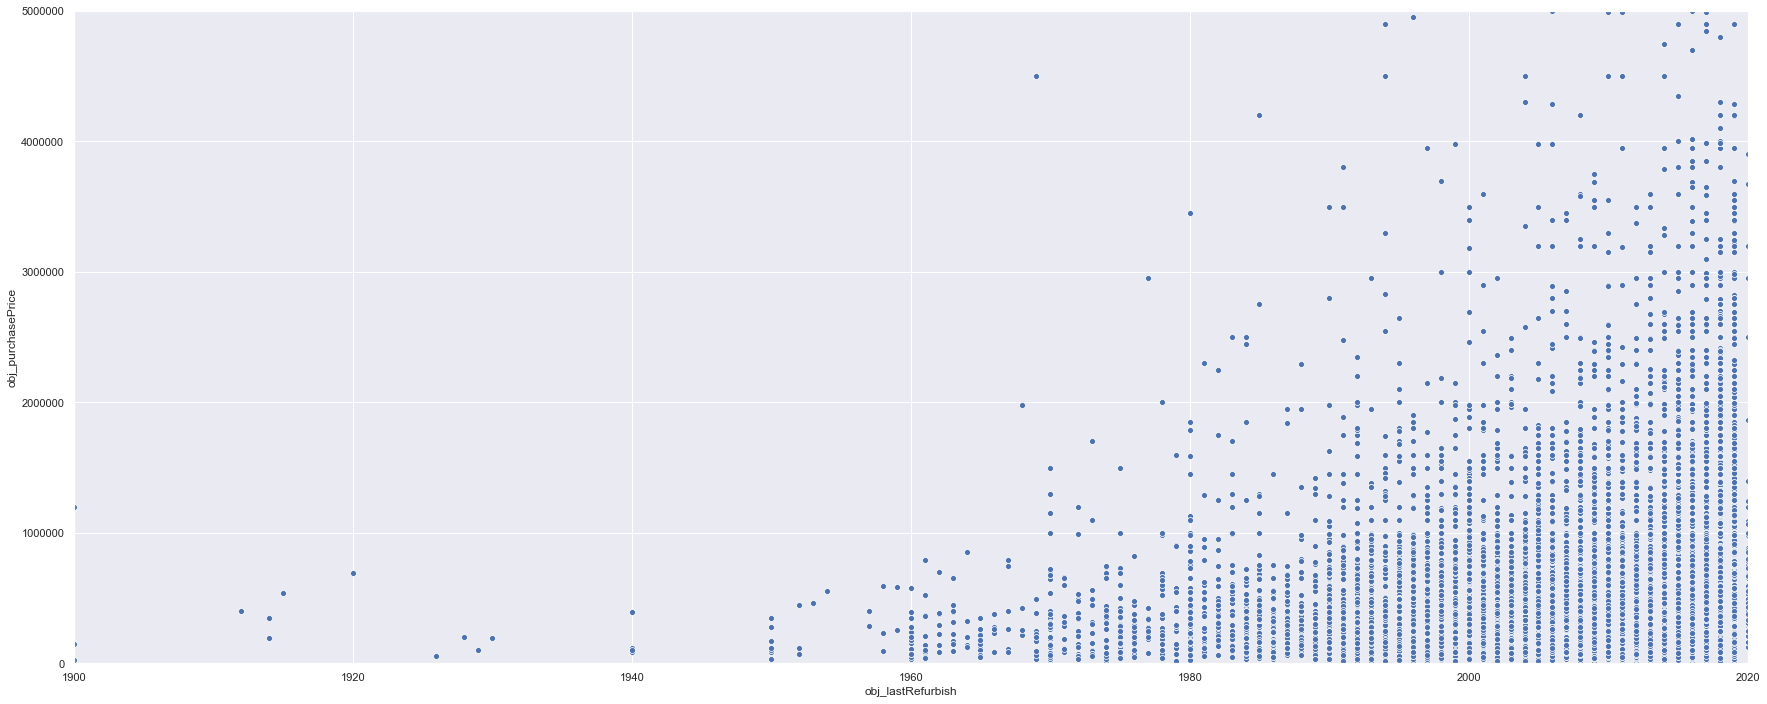

In [111]:
sns.set(font_scale = 1)
plt.figure(figsize=(30,12))
sns.scatterplot(x = 'obj_lastRefurbish', y = 'obj_purchasePrice', data=df_full)
plt.ylim(0, 5000000)
plt.xlim(1900, 2020)

In [112]:
grouped = df_full.groupby(['lastRefurbish_years_category','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['lastRefurbish_years_category','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['lastRefurbish_years_category','geo_bln'], right_on=['lastRefurbish_years_category','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['lastRefurbish_years_category','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='lastRefurbish_years_category', values='Amount_offers')
grouped = grouped.reindex_axis(['Before 1500','1500-1599', '1600-1699','1700-1799','1800-1849','1850-1899','1900-1909','1910-1919','1920-1929','1930-1939','1940-1949','1950-1959','1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019','Future','Not known'], axis=1)
grouped.fillna(0, inplace=True)
grouped

C:\Users\d6002091\Downloads\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  if __name__ == '__main__':


lastRefurbish_years_category,Before 1500,1500-1599,1600-1699,1700-1799,1800-1849,1850-1899,1900-1909,1910-1919,1920-1929,1930-1939,1940-1949,1950-1959,1960-1969,1970-1979,1980-1989,1990-1999,2000-2009,2010-2019,Future,Not known
geo_bln,,,,,,,,,,,,,,,,,,,,
Baden_Württemberg,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,6.00,24.00,38.00,93.00,273.00,750.00,1892.00,14.00,9170.00
Bayern,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,2.00,3.00,12.00,35.00,88.00,240.00,616.00,1875.00,35.00,11222.00
Berlin,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,5.00,47.00,57.00,318.00,8.00,1519.00
Brandenburg,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,4.00,13.00,149.00,233.00,583.00,23.00,4140.00
Bremen,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,7.00,13.00,29.00,117.00,0.00,637.00
Hamburg,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,11.00,34.00,133.00,0.00,1012.00
Hessen,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,14.00,34.00,84.00,211.00,453.00,1465.00,8.00,6660.00
Mecklenburg_Vorpommern,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,3.00,4.00,154.00,204.00,442.00,1.00,2232.00
Niedersachsen,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,7.00,34.00,71.00,215.00,549.00,1935.00,6.00,9946.00


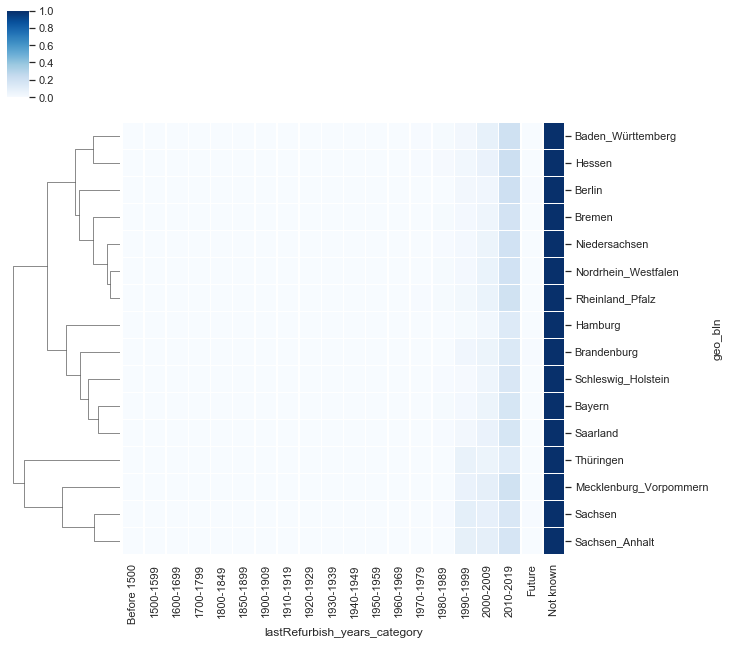

In [113]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0, col_cluster=False)

## ↑ Clustermap: Amount of houses by Region and renovation year

For sure, houses tend to be renovated within the last 30 years. For many values, the values are not known.

In [145]:
grouped = df_full.groupby(['lastRefurbish_years_category','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='lastRefurbish_years_category', values='obj_purchasePrice')
grouped = grouped.reindex_axis(['Before 1500','1500-1599', '1600-1699','1700-1799','1800-1849','1850-1899','1900-1909','1910-1919','1920-1929','1930-1939','1940-1949','1950-1959','1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019','Future','Not known'], axis=1)
grouped.fillna(0, inplace=True)
grouped

C:\Users\d6002091\Downloads\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """


lastRefurbish_years_category,Before 1500,1500-1599,1600-1699,1700-1799,1800-1849,1850-1899,1900-1909,1910-1919,1920-1929,1930-1939,1940-1949,1950-1959,1960-1969,1970-1979,1980-1989,1990-1999,2000-2009,2010-2019,Future,Not known
geo_bln,,,,,,,,,,,,,,,,,,,,
Baden_Württemberg,0.00,0.00,0.00,0.00,0.00,0.00,0.00,374500.00,0.00,0.00,0.00,362400.00,377260.87,414223.68,546961.11,539636.29,668332.52,695882.98,1204948.14,577656.31
Bayern,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100000.00,195000.00,255000.00,126333.33,207733.33,519425.71,579234.48,611276.59,639766.53,805931.89,954888.13,712422.26
Berlin,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,590000.00,4500000.00,0.00,3551000.00,851057.45,1067157.39,1243435.74,337390.00,1190329.57
Brandenburg,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,80000.00,125125.00,155833.33,303607.28,353923.07,432937.71,279300.95,429177.16
Bremen,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,449000.00,680000.00,436714.29,368769.23,467321.43,387820.50,0.00,400288.46
Hamburg,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1980000.00,0.00,0.00,1028545.45,1095808.82,1100364.84,0.00,1003275.95
Hessen,550000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,286000.00,187207.69,428023.53,439581.93,438929.71,690537.12,693715.61,522699.38,547354.72
Mecklenburg_Vorpommern,0.00,0.00,0.00,0.00,0.00,0.00,0.00,195000.00,0.00,0.00,0.00,0.00,29000.00,265333.33,226250.00,255971.48,327073.00,352580.86,160000.00,317088.13
Niedersachsen,269000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,29000.00,225750.00,247000.00,293910.70,317291.98,336153.74,378000.75,827083.33,340745.08


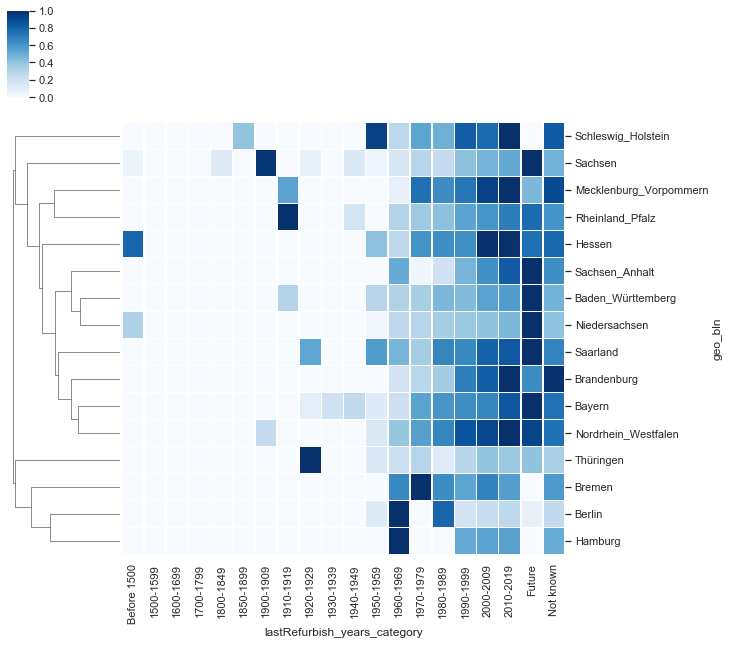

In [146]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0, col_cluster=False)

## ↑ Clustermap: Average price of houses by Region and renovation year

And houses are getting more expensive over the years.

In [119]:
df_full['obj_pricetrend'] = pd.to_numeric(df_full['obj_pricetrend'],errors='coerce')
df_full['obj_pricetrend'].head()

0   8.28
1   7.33
2   5.64
3   6.68
4   1.85
Name: obj_pricetrend, dtype: float64

In [120]:
#Transform method taking points as param
def transform_trend(pricetrend):
    if pricetrend < 2:
        return "Below 2"
    elif pricetrend >= 2 and pricetrend < 5:
        return "2-4" 
    elif pricetrend >= 5 and pricetrend < 8:
        return "5-7"  
    elif pricetrend >= 8 and pricetrend < 11:
        return "8-10" 
    elif pricetrend >= 11 and pricetrend < 14:
        return "11-13" 
    elif pricetrend >= 14 and pricetrend < 17:
        return "14-16" 
    elif pricetrend >= 17 and pricetrend < 20:
        return "17-19" 
    elif pricetrend > 19:
        return "Above or erqual 20"
    else:
        return "Not known"

#Applying transform method and assigning result to new column "points_simplified"
df_full = df_full.assign(obj_pricetrend_category = df_full['obj_pricetrend'].apply(transform_trend))
df_full[['obj_pricetrend','obj_pricetrend_category']].head(10)

,obj_pricetrend,obj_pricetrend_category
0,8.28,8-10
1,7.33,5-7
2,5.64,5-7
3,6.68,5-7
4,1.85,Below 2
5,5.95,5-7
6,nan,Not known
7,9.36,8-10
8,0.78,Below 2
9,2.03,2-4


## ↑ For the pricetrend we need to create categories as well.

In [121]:
grouped = df_full.groupby('obj_pricetrend_category').mean()
grouped = grouped[['obj_pricetrend','obj_lastRefurbish','obj_yearConstructed','obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_pricetrend_category').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_pricetrend_category','URL']], left_on='obj_pricetrend_category', right_on='obj_pricetrend_category')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('obj_pricetrend_category', ascending=False).reset_index(drop="True")
grouped

,obj_pricetrend_category,obj_pricetrend,obj_lastRefurbish,obj_yearConstructed,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,...,obj_thermalChar,obj_usableArea,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,Not known,nan,2007.42,1965.46,350379.21,217.19,2009.16,2.71,6.84,2.05,...,149.53,172.80,341.89,4.48,2706.17,1961.85,1129.02,61.49,407.54,19195
1,Below 2,-0.23,2007.90,1948.01,303889.99,221.90,1461.10,8.58,7.47,2.22,...,169.21,173.06,320.78,4.25,2521.16,1785.25,689.40,65.93,382.83,6000
2,Above or erqual 20,21.44,2007.94,1969.30,353537.89,188.73,773.09,1.89,6.49,2.24,...,154.20,126.48,348.23,3.69,2754.94,2049.86,653.03,67.15,790.23,70
3,8-10,9.25,2010.18,1969.84,568482.48,223.61,1222.54,2.45,6.76,2.29,...,152.12,124.42,362.23,4.70,2829.75,3056.65,2415.80,70.16,773.16,24158
4,5-7,6.54,2009.51,1968.57,522211.29,207.23,1316.80,2.46,6.71,2.26,...,154.61,125.31,362.52,4.49,2840.91,2967.79,1808.56,72.24,834.89,33884
5,2-4,3.86,2008.99,1959.97,434477.93,223.42,1389.98,2.54,6.98,2.25,...,161.24,138.88,335.99,4.30,2636.74,2470.43,3278.32,69.95,566.59,14028
6,17-19,18.02,2009.44,1962.14,575766.04,207.15,853.70,2.16,7.05,2.24,...,127.34,143.21,356.62,5.10,2757.09,2707.44,1096.03,79.93,905.11,151
7,14-16,15.07,2009.68,1972.92,620449.01,209.62,1267.58,2.29,6.80,2.25,...,134.58,159.81,350.25,4.17,2733.10,3218.68,1721.71,75.54,961.46,2190
8,11-13,12.29,2010.10,1970.78,626260.17,207.37,1515.25,2.36,6.97,2.32,...,144.51,128.64,347.70,4.32,2713.15,3336.44,1620.37,71.81,948.57,8196


In [122]:
grouped = df_full.groupby(['obj_pricetrend_category','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_pricetrend_category','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_pricetrend_category','geo_bln'], right_on=['obj_pricetrend_category','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_pricetrend_category','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_pricetrend_category', values='Amount_offers')
grouped = grouped.reindex_axis(['Below 2','2-4','5-7','8-10','11-13','14-16','17-19','Above or erqual 20','Not known'], axis=1)
grouped.fillna(0, inplace=True)
grouped

C:\Users\d6002091\Downloads\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  if __name__ == '__main__':


obj_pricetrend_category,Below 2,2-4,5-7,8-10,11-13,14-16,17-19,Above or erqual 20,Not known
geo_bln,,,,,,,,,
Baden_Württemberg,153.00,1222.00,2821.00,4757.00,2158.00,253.00,5.00,0.00,893.00
Bayern,670.00,1845.00,4739.00,3873.00,945.00,151.00,11.00,0.00,1896.00
Berlin,0.00,0.00,0.00,19.00,1339.00,276.00,0.00,0.00,322.00
Brandenburg,148.00,330.00,327.00,1068.00,1330.00,680.00,26.00,49.00,1188.00
Bremen,0.00,95.00,634.00,6.00,0.00,0.00,0.00,0.00,70.00
Hamburg,5.00,60.00,1021.00,65.00,5.00,0.00,0.00,0.00,35.00
Hessen,1070.00,965.00,2875.00,2983.00,291.00,9.00,0.00,0.00,740.00
Mecklenburg_Vorpommern,171.00,192.00,356.00,700.00,143.00,6.00,5.00,0.00,1469.00
Niedersachsen,250.00,1874.00,4733.00,3006.00,843.00,141.00,0.00,0.00,1918.00


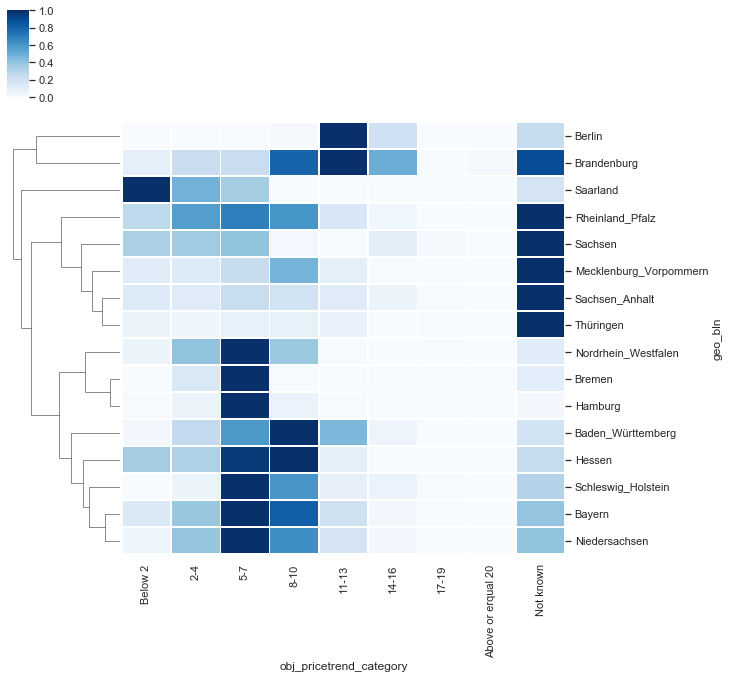

In [123]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0, col_cluster=False)

## ↑ Clustermap: Amount of houses by Region and pricetrend

Most of the houses with a pricetrend seem to sit in the 5-7 and 8-10 category. Interestingly: Berlin and Brandenburg have most of their houses are in the 11-13 category - becoming more expensive at a faster pace over time.

In [124]:
grouped = df_full.groupby(['obj_pricetrend_category','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_pricetrend_category', values='obj_purchasePrice')
grouped = grouped.reindex_axis(['Below 2','2-4','5-7','8-10','11-13','14-16','17-19','Above or erqual 20','Not known'], axis=1)
grouped.fillna(0, inplace=True)
grouped

C:\Users\d6002091\Downloads\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """


obj_pricetrend_category,Below 2,2-4,5-7,8-10,11-13,14-16,17-19,Above or erqual 20,Not known
geo_bln,,,,,,,,,
Baden_Württemberg,412034.56,506767.75,644254.58,601143.76,649020.37,730028.35,1494547.16,0.00,443395.58
Bayern,379643.44,841232.34,820313.86,703893.03,712949.96,626714.33,618545.45,0.00,501499.45
Berlin,0.00,0.00,0.00,452778.95,1029700.60,872915.03,0.00,0.00,2169538.35
Brandenburg,240989.31,394100.41,355726.17,469655.98,462779.76,610711.86,863515.00,368030.33,263474.32
Bremen,0.00,299288.27,410407.87,515650.00,0.00,0.00,0.00,0.00,444418.96
Hamburg,5176000.00,577328.48,913497.88,1488579.18,1323000.00,0.00,0.00,0.00,3300257.14
Hessen,227064.84,369894.00,567948.80,772810.26,853039.32,1900333.33,0.00,0.00,427479.19
Mecklenburg_Vorpommern,240838.75,282339.38,345306.03,374083.63,467291.70,362333.33,328420.00,0.00,285187.51
Niedersachsen,298477.88,333680.24,341637.73,389596.85,347091.64,325112.07,0.00,0.00,300776.65


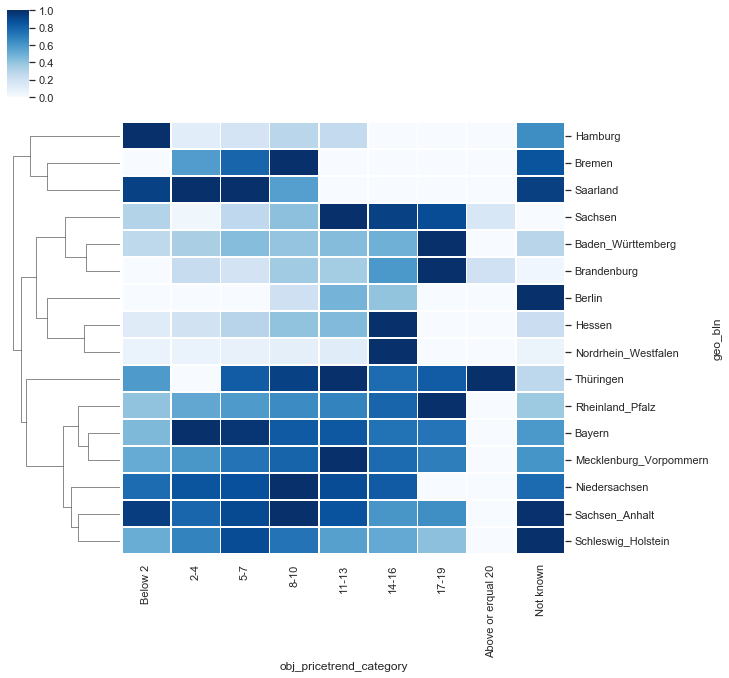

In [125]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0, col_cluster=False)

## ↑ Clustermap: Average price of houses by Region and pricetrend

There is no clear pattern in terms of pricing: No indication that pricetrend variable has an influence on the final housing price. 

## Expose features

In [126]:
grouped = df_full.groupby('ga_cd_via').mean()
grouped = grouped[['obj_pricetrend','obj_lastRefurbish','obj_yearConstructed','obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('ga_cd_via').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['ga_cd_via','URL']], left_on='ga_cd_via', right_on='ga_cd_via')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('ga_cd_via', ascending=False).reset_index(drop="True")
grouped

,ga_cd_via,obj_pricetrend,obj_lastRefurbish,obj_yearConstructed,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,...,obj_thermalChar,obj_usableArea,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,top,7.20,2009.11,1965.72,491208.50,207.94,1487.76,3.18,6.93,2.25,...,156.28,134.43,351.34,4.44,2756.35,2675.83,2006.66,69.56,703.91,45983
1,standard,7.06,2009.15,1965.84,449165.86,221.45,1422.80,2.47,6.73,2.19,...,154.31,143.14,343.48,4.44,2696.46,2565.73,1426.57,69.01,653.12,53227
2,schaufenster,7.70,2008.37,1983.49,1059000.91,239.37,1159.94,2.24,6.40,2.51,...,115.93,133.05,451.73,4.72,3534.14,5702.24,3434.16,76.05,1267.02,883
3,premium,7.62,2010.41,1971.33,674243.84,218.69,1439.04,2.82,7.17,2.43,...,141.17,119.65,397.61,4.96,3101.10,3563.91,4807.84,71.36,883.21,7779


## ↑ Expose feature - type

There are four categories with different characteristics.

        -Standard: Ordinary expose
        -Top: Placed before all standard exposes
        -Premium: Bigger pictures and enhanced functions
        -Schaufenster: Similar to premium but without advertising of other companies

In [146]:
grouped = df_full.groupby(['ga_cd_via','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['ga_cd_via','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['ga_cd_via','geo_bln'], right_on=['ga_cd_via','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['ga_cd_via','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='ga_cd_via', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

ga_cd_via,premium,schaufenster,standard,top
geo_bln,,,,
Baden_Württemberg,924,98,6069,5171
Bayern,981,201,7355,5593
Berlin,216,66,766,908
Brandenburg,374,43,2531,2198
Bremen,75,12,391,327
Hamburg,159,26,543,463
Hessen,821,104,4086,3922
Mecklenburg_Vorpommern,217,23,1414,1388
Niedersachsen,790,48,6680,5247


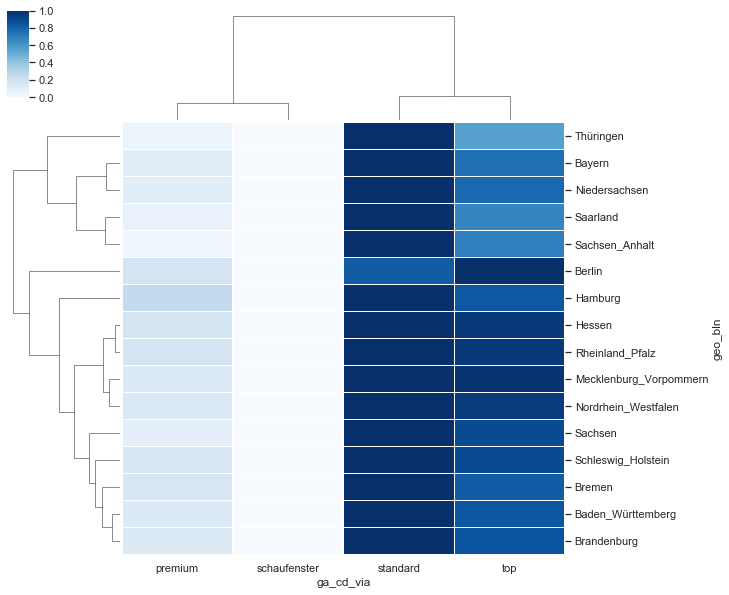

In [147]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Amount of houses by Region and expose type

Modt of the offers are in the standard category. Hamburg and Berlin stand out since they are using the Top and premium category more.

In [148]:
grouped = df_full.groupby(['ga_cd_via','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='ga_cd_via', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

ga_cd_via,premium,schaufenster,standard,top
geo_bln,,,,
Baden_Württemberg,726790.01,966352.84,578883.84,593424.88
Bayern,1098400.12,1729460.19,627726.60,733777.44
Berlin,1134989.43,1566054.14,1255397.79,1119753.08
Brandenburg,552471.67,995728.44,389885.86,423870.00
Bremen,428472.29,410693.33,414638.38,378124.93
Hamburg,1020666.85,1037565.77,1004168.76,1031439.13
Hessen,771493.39,777092.41,532875.19,568124.22
Mecklenburg_Vorpommern,451680.43,431219.09,312115.08,302950.95
Niedersachsen,405843.76,725154.96,326096.49,356320.92


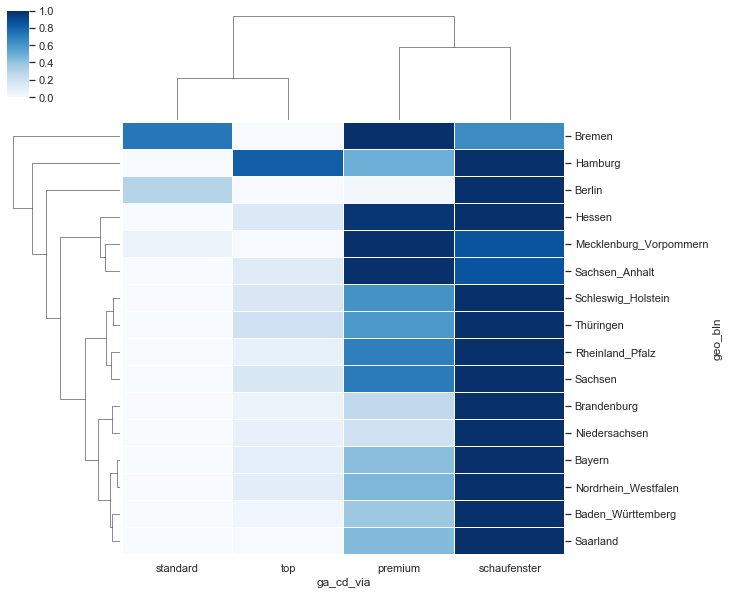

In [149]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Average price of houses by Region and expose type

Clearly, the houses in the Schaufenster category are being most expensive, followed by premium, top and then standard. 

In [150]:
grouped = df_full.groupby('obj_ExclusiveExpose').mean()
grouped = grouped[['obj_pricetrend','obj_lastRefurbish','obj_yearConstructed','obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_ExclusiveExpose').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_ExclusiveExpose','URL']], left_on='obj_ExclusiveExpose', right_on='obj_ExclusiveExpose')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('obj_ExclusiveExpose', ascending=False).reset_index(drop="True")
grouped

,obj_ExclusiveExpose,obj_pricetrend,obj_lastRefurbish,obj_yearConstructed,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,...,obj_thermalChar,obj_usableArea,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,true,7.28,2008.07,1974.50,447321.72,206.88,1277.21,2.55,6.11,2.04,...,151.77,121.62,372.50,4.02,2969.58,2614.31,1694.32,68.71,591.51,30813
1,false,7.13,2009.57,1963.45,504726.34,219.13,1516.78,2.91,7.13,2.31,...,154.60,142.17,343.16,4.66,2672.56,2749.60,2033.09,69.79,737.92,76902
2,None,6.94,2008.62,1965.79,491994.05,227.02,2316.12,2.79,7.97,2.09,...,128.85,160.19,395.57,3.92,3104.24,2364.14,859.47,75.27,962.56,157


In [151]:
grouped = df_full.groupby(['obj_ExclusiveExpose','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_ExclusiveExpose','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_ExclusiveExpose','geo_bln'], right_on=['obj_ExclusiveExpose','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_ExclusiveExpose','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_ExclusiveExpose', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_ExclusiveExpose,None,false,true
geo_bln,,,
Baden_Württemberg,21.00,8448.00,3793.00
Bayern,9.00,10315.00,3806.00
Berlin,1.00,1436.00,519.00
Brandenburg,5.00,3273.00,1868.00
Bremen,0.00,561.00,244.00
Hamburg,0.00,860.00,331.00
Hessen,9.00,6706.00,2218.00
Mecklenburg_Vorpommern,5.00,2291.00,746.00
Niedersachsen,14.00,9215.00,3536.00


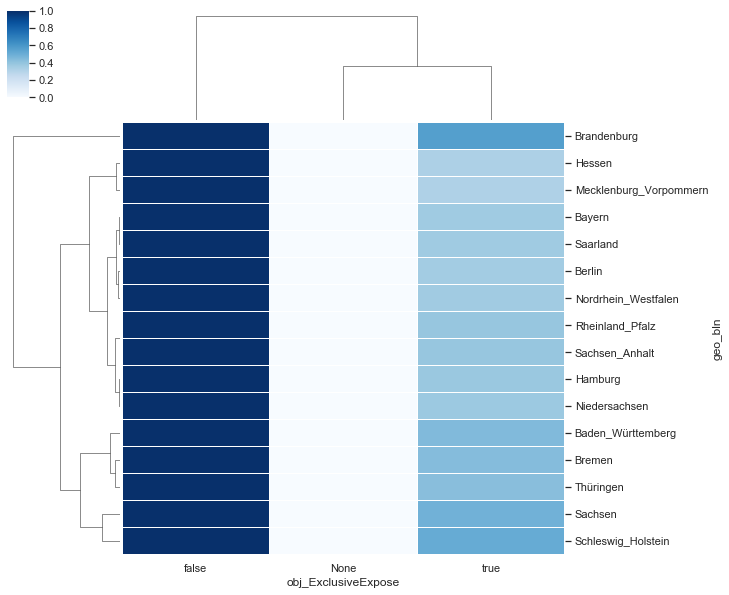

In [152]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Amount of houses by Region and exclusive expose

Most of the houses have no exclusive expose. In Brandenburg and Schleswig-Hollstein is a tendency to exclusive exposes. 

In [153]:
grouped = df_full.groupby(['obj_ExclusiveExpose','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_ExclusiveExpose', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_ExclusiveExpose,None,false,true
geo_bln,,,
Baden_Württemberg,664563.33,640328.24,507422.58
Bayern,659766.67,721092.05,709956.91
Berlin,920000.00,1289372.41,914121.42
Brandenburg,399200.00,431971.41,402606.89
Bremen,0.00,412449.54,374795.11
Hamburg,0.00,1060803.43,905715.23
Hessen,393683.33,608172.49,467888.67
Mecklenburg_Vorpommern,282779.80,331042.94,281402.24
Niedersachsen,331274.14,340808.58,355818.86


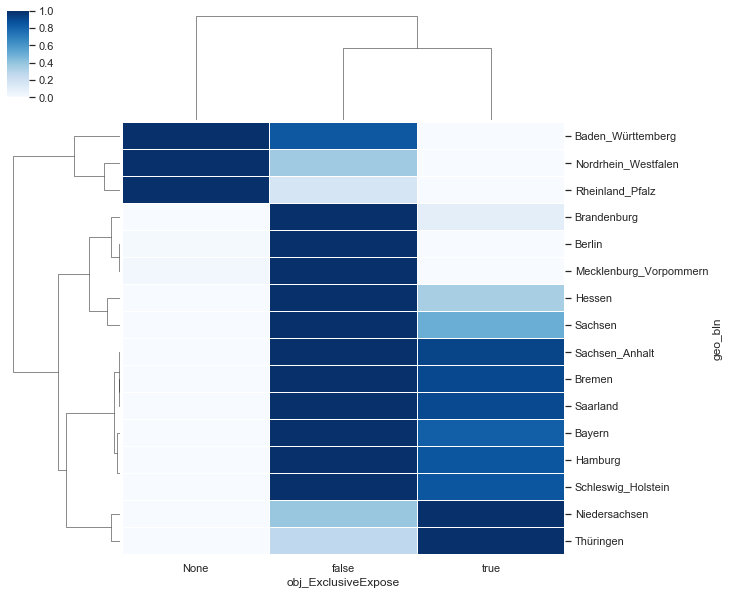

In [154]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Average price of houses by Region and exclusive expose

The exclusivity of the expose has no clear influence on pricing by region.

In [155]:
grouped = df_full.groupby('obj_courtage').mean()
grouped = grouped[['obj_pricetrend','obj_lastRefurbish','obj_yearConstructed','obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_courtage').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_courtage','URL']], left_on='obj_courtage', right_on='obj_courtage')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('obj_courtage', ascending=False).reset_index(drop="True")
grouped

,obj_courtage,obj_pricetrend,obj_lastRefurbish,obj_yearConstructed,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,...,obj_thermalChar,obj_usableArea,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,True,7.20,2009.01,1958.75,527882.45,224.09,1631.89,3.02,7.27,2.29,...,163.79,146.89,366.01,4.28,2826.75,2763.68,1703.23,69.77,734.49,70118
1,False,7.09,2010.11,1982.04,414493.24,186.06,1121.15,2.12,6.08,2.15,...,103.04,120.18,322.91,4.88,2612.85,2564.39,2291.94,68.73,633.15,35887


In [160]:
grouped = df_full.groupby(['obj_courtage','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_courtage','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_courtage','geo_bln'], right_on=['obj_courtage','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_courtage','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_courtage', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_courtage,False,True
geo_bln,,
Baden_Württemberg,3916,7963
Bayern,4691,9218
Berlin,437,1504
Brandenburg,1882,3228
Bremen,192,613
Hamburg,342,816
Hessen,3193,5579
Mecklenburg_Vorpommern,832,2183
Niedersachsen,3636,8971


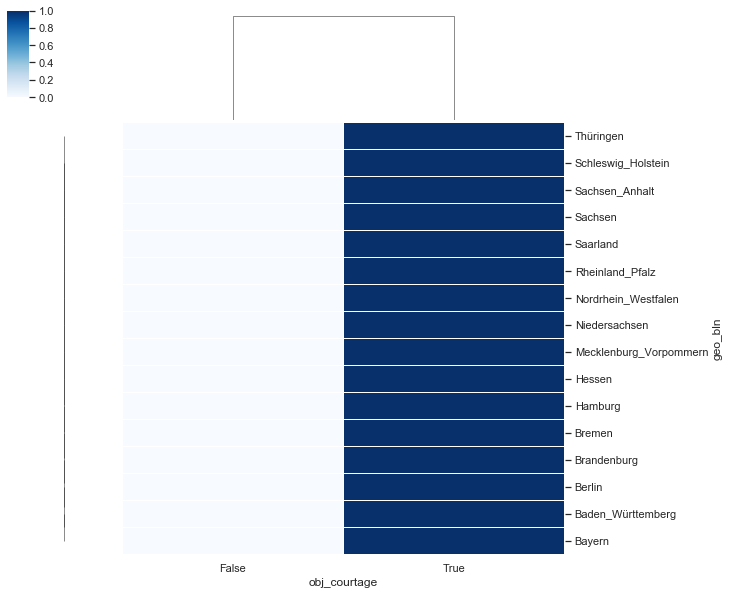

In [161]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Amount of houses by Region and exclusive expose

Most of the houses seem to have a fee.

In [162]:
grouped = df_full.groupby(['obj_courtage','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_courtage', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_courtage,False,True
geo_bln,,
Baden_Württemberg,523693.77,642371.62
Bayern,644930.75,760762.03
Berlin,835887.50,1297035.83
Brandenburg,339415.91,466410.54
Bremen,383338.69,406579.40
Hamburg,767411.82,1121364.01
Hessen,481985.97,630545.62
Mecklenburg_Vorpommern,259893.58,341587.21
Niedersachsen,319038.43,355495.68


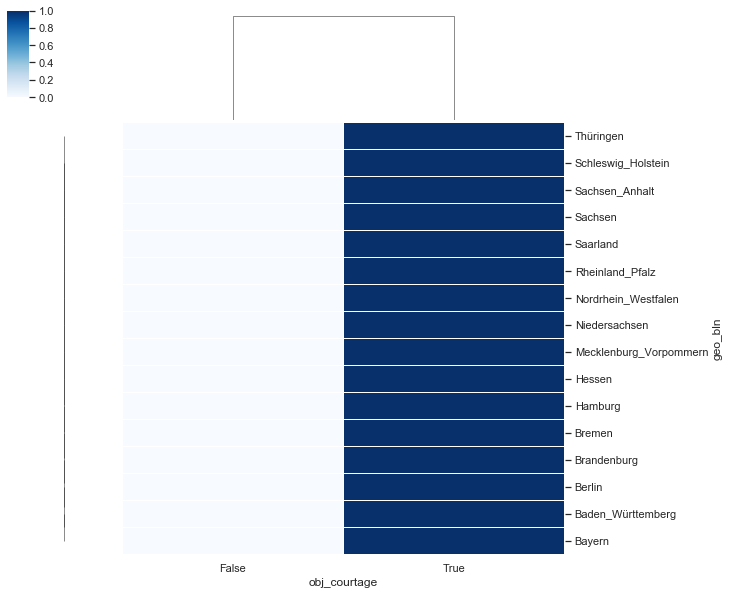

In [163]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Average price of houses by Region and exclusive expose

And these houses seem to be most expensive.

In [ ]:
##More to come.....